# Analytics for Financial Markets- Final Project
#### ML-based stock portfolio

### Context:
Machine learning techniques have become popular as of late. The company management has asked you to generate a data-driven portfolio that implements ML-based allocation decisions on the equity portion of your portfolio. Your main objective is to come up with an ML-based model that predicts the high performing stocks in the next 6 months. If your model is shown to be successful, the company management wishes to launch your ML-based model portfolio as an investable index product with a flashy name such as AIM Sector Perform Index.  
With some prospect for a good bonus and professional fame, the team has already started to build an approach. As the first step, a large historical data set is constructed. The data set consists of stock returns and many company features driven from financial accounts such as valuation ratios, profitability ratios etc. 

Organize the data set, prepare the variables for standard ML algorithms available in resources. Choose the approach that you prefer. Make sure the data set is organised and prepared (scaling, normalization etc.) according to your analysis method.  

**General guideline**
- Examine the given data set (historical stock returns and features) carefully
- At each point in time, group the stocks (available at that time) into buckets of FUTURE RETURNS over a selected time horizon (6 month). Identify the Future Winners (1) and Future Losers (0)
- Scale (normalize) all the Features available or possible to use (at each point in time) 

Then;
- Run the ML method(s) of your choice to identify the features that have the greatest importance (and significance) to distinguish the group of stocks with the highest future returns from the ones that show the lowest future returns.
- Present the results of your ML approach along with a description of your method. 
- Are there any features that you would propose to use for the new AI-driven product? Are the ML model results statistically or economically convincing? Briefly explain. 
- How do your results change when you use different train-test samples? Do the “useful features” change with the sample?  

Show how the set of “important features” (if any) change over moving-window samples. 
In conclusion, propose an ML model for the AIM Index, and use it to select a stock portfolio as of 2022-December.  

## Data Preparation and ML Modeling

In [ ]:
# Import the useful modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import math

import missingno as msno
import os
import warnings
pd.set_option('display.max_columns', None)
# pd.set_option("max_rows", None)
warnings.filterwarnings("ignore")

In [ ]:
# Import the datasets
fratios_data = pd.read_csv('MMA823Project/Stock_Financial_Ratios_Data_2022.csv',
                          parse_dates=['adate','qdate','public_date'])
sectors_data = pd.read_excel('MMA823Project/Sector Information.xlsx')

stocks_returns_data = pd.read_excel('MMA823Project/Stock_Volume&RelativeRet.xlsx')

In [ ]:
fratios_data.drop_duplicates(inplace=True)
fratios_data.describe()

,gvkey,permno,CAPEI,bm,evm,pe_op_basic,pe_op_dil,pe_exi,pe_inc,ps,pcf,dpr,npm,opmbd,opmad,gpm,ptpm,cfm,roa,roe,roce,efftax,aftret_eq,aftret_invcapx,aftret_equity,pretret_noa,pretret_earnat,GProf,equity_invcap,debt_invcap,totdebt_invcap,capital_ratio,int_debt,int_totdebt,cash_lt,invt_act,rect_act,debt_at,debt_ebitda,short_debt,curr_debt,lt_debt,profit_lct,ocf_lct,cash_debt,fcf_ocf,lt_ppent,dltt_be,debt_assets,debt_capital,de_ratio,intcov,intcov_ratio,cash_ratio,quick_ratio,curr_ratio,cash_conversion,inv_turn,at_turn,rect_turn,pay_turn,sale_invcap,sale_equity,sale_nwc,rd_sale,adv_sale,staff_sale,accrual,ptb,PEG_trailing
count,124582.000000,124582.000000,123755.000000,120883.000000,123888.000000,123504.000000,123490.000000,123483.000000,123508.000000,124486.000000,124392.000000,112554.000000,124486.000000,124486.000000,124486.000000,124462.000000,124486.000000,123768.000000,124401.000000,120820.000000,123986.000000,110927.000000,124401.000000,122948.000000,124401.000000,108172.000000,108172.000000,124518.000000,124317.000000,124044.000000,123993.000000,124254.000000,110026.000000,110808.000000,124455.000000,107091.000000,108291.000000,124197.000000,123558.000000,119196.000000,108421.000000,124254.000000,108489.000000,108393.000000,123837.000000,119351.000000,122821.000000,120900.000000,124455.000000,123037.00000,124455.000000,112305.000000,112296.000000,108493.000000,108493.000000,108493.000000,9.853900e+04,102713.000000,124369.000000,123239.000000,120189.000000,124276.000000,120742.000000,88721.000000,124530.000000,124453.000000,124453.000000,124392.000000,120883.000000,78568.000000
mean,39867.628421,56936.397449,25.761034,0.521267,9.090707,18.667361,18.979870,18.472566,18.087534,2.700101,12.857992,0.528435,-0.122135,0.085091,0.014625,0.415174,-0.086651,-0.038570,0.141892,0.163411,0.155489,0.263342,0.142360,0.161117,0.089075,0.332707,0.200942,0.299925,0.109047,0.870664,1.000858,0.391911,0.278681,0.094403,0.325602,0.219072,0.334172,0.274449,1.506020,0.173275,0.407327,0.358261,0.846930,0.664052,0.223380,0.376793,19.579042,1.263407,0.627862,0.50143,3.268230,54.865689,102.946824,0.759494,1.481480,1.879524,2.306711e+03,40.623486,0.847587,27.678907,9.892295,3.759991,4.394347,23.059469,0.095557,0.014472,0.047827,-0.050290,4.233059,2.400472
std,55512.160192,28400.771037,969.951454,0.719455,965.206858,64.844897,66.687653,77.516682,74.616764,5.658183,26.325475,6.960643,20.590048,14.368698,15.160762,0.504789,20.623754,19.760884,0.106649,0.723066,3.231691,1.162260,18.484465,9.166923,20.574195,10.064684,0.178598,0.222268,95.560426,94.502544,104.389262,2.144189,13.474291,2.795809,0.663989,0.202238,0.182909,0.224489,243.718821,1.433607,0.215792,0.214541,0.770443,0.620867,0.304048,5.703016,82.534341,12.389207,0.255532,1.44142,144.868312,2121.607581,1922.902017,1.149831,1.270647,1.348082,9.251916e+04,956.460541,0.700002,482.266358,13.344242,463.084793,85.541253,606.686558,8.794426,0.032588,0.192977,0.069799,6.265227,6.960305
min,1075.000000,10078.000000,-125202.000000,0.000000,-189703.000000,-3190.000000,-3190.000000,-3000.000000,-2606.500000,0.011000,-530.850000,-3.678000,-3268.600000,-2420.800000,-2513.900000,-44.154000,-3274.500000,-3126.100000,-1.009000,-39.933000,-655.130000,-55.398000,-2388.700000,-4.124000,-2388.700000,-799.590000,-1.125000,-2.529000,-19452.000000,-86.226000,-306.740000,-334.730000,-0.024000,-0.022000,0.000000,0.000000,0.000000,0.000000,-48898.000000,-0.505000,0.040000,0.000000,-12.670000,-8.525000,-7.341000,-538.400000,0.061000,0.000000,0.039000,-213.02000,-9212.800000,-265996.000000,-84522.000000,0.000000,0.085000,0.110000,2.000000e-03,-49.385000,0.000000,0.030000,-37.918000,-592.170000,0.000000,-70400.000000,0.000000,0.000000,0.000000,-1.449000,0.056000,-134.810000
25%,6653.000000,25778.000000,13.631000,0.229000,8.207000,10.839000,11.010000,10.287000,9.962000,0.917000,6.629000,0.006000,0.039000,0.124000,0.083000,0.256000,0.057000,0.081000,0.083000,0.071000,0.089000,0.214000,0.076000,0.051000,0.076000,0.130000,0.095000,

In [ ]:
fratios_data['divyield'] = fratios_data['divyield'].str.replace('%', '')
fratios_data['divyield']=fratios_data['divyield'].str.rstrip('%').astype('float') / 100

In [ ]:
# Generate year & month variables (may be useful to group the data, not necessary)
fratios_data['year'] = fratios_data['public_date'].dt.year
fratios_data['month'] = fratios_data['public_date'].dt.month

# drop unncessary columns
fratios_data = fratios_data.drop(columns=['adate','qdate'])

In [ ]:
# Merge the datasets and filter the sector
filtered_sectors = sectors_data[['permno','Sector Name']][sectors_data['Sector Name'].isin(['Energy', 'Utilities'])]
filtered_sectors.drop_duplicates(inplace=True)
filtered_fratios=fratios_data.merge(filtered_sectors, on='permno')

In [ ]:
filtered_fratios.shape

(15840, 77)

In [ ]:
filtered_fratios.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15840 entries, 0 to 15839
Data columns (total 77 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   gvkey            15840 non-null  int64         
 1   permno           15840 non-null  int64         
 2   public_date      15840 non-null  datetime64[ns]
 3   CAPEI            15745 non-null  float64       
 4   bm               15808 non-null  float64       
 5   evm              15833 non-null  float64       
 6   pe_op_basic      15737 non-null  float64       
 7   pe_op_dil        15739 non-null  float64       
 8   pe_exi           15733 non-null  float64       
 9   pe_inc           15743 non-null  float64       
 10  ps               15833 non-null  float64       
 11  pcf              15822 non-null  float64       
 12  dpr              13779 non-null  float64       
 13  npm              15833 non-null  float64       
 14  opmbd            15833 non-null  float

# Outliers

First, we simply drop those instances having at least one feature in 1% extreme values of the corresponding year.

In [ ]:
all_years = filtered_fratios['year'].unique()
non_usecol_list = ['gvkey', 'permno', 'public_date','TICKER', 'cusip', 'year', 'month', 'Sector Name']
ratio_cols= filtered_fratios.columns.drop(non_usecol_list)
no_outlier_df = filtered_fratios

for year in all_years:
    condition= no_outlier_df['year'] == year
    Q_u = no_outlier_df[ratio_cols][condition].quantile(0.995)
    Q_l = no_outlier_df[ratio_cols][condition].quantile(0.005)
    outlier_cond= ((no_outlier_df[ratio_cols][condition]<Q_l)|(no_outlier_df[ratio_cols][condition]>Q_u)).any(axis=1)

    no_outlier_df=no_outlier_df.drop(no_outlier_df[condition][outlier_cond].index)

In [ ]:
pd.set_option('display.max_columns', None)
no_outlier_df.describe()

,gvkey,permno,CAPEI,bm,evm,pe_op_basic,pe_op_dil,pe_exi,pe_inc,ps,pcf,dpr,npm,opmbd,opmad,gpm,ptpm,cfm,roa,roe,roce,efftax,aftret_eq,aftret_invcapx,aftret_equity,pretret_noa,pretret_earnat,GProf,equity_invcap,debt_invcap,totdebt_invcap,capital_ratio,int_debt,int_totdebt,cash_lt,invt_act,rect_act,debt_at,debt_ebitda,short_debt,curr_debt,lt_debt,profit_lct,ocf_lct,cash_debt,fcf_ocf,lt_ppent,dltt_be,debt_assets,debt_capital,de_ratio,intcov,intcov_ratio,cash_ratio,quick_ratio,curr_ratio,cash_conversion,inv_turn,at_turn,rect_turn,pay_turn,sale_invcap,sale_equity,sale_nwc,rd_sale,adv_sale,staff_sale,accrual,ptb,PEG_trailing,divyield,year,month
count,12033.000000,12033.000000,11984.000000,12028.000000,12029.000000,11971.00000,11971.000000,11974.000000,11976.000000,12029.000000,12021.000000,10837.000000,12029.000000,12029.000000,12029.000000,12029.000000,12029.000000,12023.000000,12021.000000,12021.000000,12015.000000,10617.000000,12021.000000,11944.000000,12021.000000,12021.000000,12021.000000,12029.000000,12029.000000,12029.000000,12029.000000,12029.000000,11941.000000,11941.000000,12029.000000,11640.000000,12029.000000,12029.000000,12029.000000,12023.000000,12029.000000,12029.000000,12029.000000,12021.000000,12001.000000,11975.000000,12029.000000,12029.000000,12029.000000,11929.000000,12029.000000,11952.000000,11952.000000,12029.000000,12029.000000,12029.000000,8959.000000,11366.000000,12021.000000,12021.000000,11495.000000,12029.000000,12029.000000,6071.000000,12031.000000,12028.000000,12028.000000,12021.000000,12028.000000,6879.000000,10852.000000,12033.000000,12033.000000
mean,24132.751600,40134.831131,24.224196,0.821042,8.948879,15.20643,15.446740,15.230030,15.559546,2.004502,8.127224,0.719870,0.061455,0.291154,0.146793,0.323559,0.094941,0.217791,0.115116,0.072233,0.102885,0.284153,0.096150,0.071956,0.095896,0.103124,0.081421,0.127371,0.524368,0.452447,0.505941,0.461451,0.061014,0.054714,0.059973,0.178566,0.403018,0.319927,3.250203,0.098959,0.225904,0.441354,0.885995,0.802508,0.163408,-0.220081,1.076206,0.819162,0.645318,0.526429,2.417543,4.490884,6.040357,0.255893,0.904284,1.111349,36.886234,17.221710,0.514018,8.576664,7.264352,0.839174,1.670490,38.661926,0.000871,0.000019,0.003058,-0.066625,1.626208,2.726089,0.031353,2011.884983,6.543339
std,44699.880188,26697.161830,104.849117,0.558322,18.477876,32.42145,32.428524,37.654061,38.506640,1.587107,9.171262,3.061587,0.203275,0.227983,0.241309,0.238100,0.276108,0.197421,0.075086,0.133710,0.104506,0.790040,0.161912,0.076774,0.158449,0.101532,0.080975,0.087094,0.167415,0.157806,0.182353,0.163465,0.016071,0.014381,0.077205,0.109843,0.136785,0.116056,6.831054,0.084336,0.108442,0.130746,0.748574,0.559535,0.124837,7.084397,0.487877,0.704174,0.127080,0.145923,2.161055,10.244452,13.665551,0.319553,0.458567,0.543499,35.113966,20.131825,0.504877,3.490092,3.657401,0.913279,1.865914,125.525321,0.003784,0.000160,0.027948,0.062422,1.016099,6.614578,0.017055,5.668704,3.345364
min,1075.000000,11404.000000,-3595.700000,0.072000,-965.350000,-526.57000,-460.750000,-401.750000,-401.750000,0.055000,-97.327000,0.000000,-3.649000,-3.628000,-4.056000,-3.512000,-5.188000,-3.272000,-0.565000,-2.121000,-0.881000,-30.122000,-2.121000,-0.588000,-2.121000,-0.809000,-0.715000,-0.738000,0.019000,0.000000,0.000000,0.000000,0.011000,0.007000,0.000000,0.000000,0.065000,0.000000,-362.690000,0.000000,0.076000,0.000000,-12.096000,-1.409000,-0.250000,-499.450000,0.250000,0.000000,0.235000,0.065000,0.346000,-55.802000,-71.348000,0.000000,0.223000,0.302000,0.114000,1.256000,0.093000,1.272000,0.364000,0.126000,0.203000,-771.580000,0.000000,0.000000,0.000000,-0.712000,0.110000,-17.241000,0.000400,2003.000000,1.000000
25%,5742.000000,22947.000000,14.105500,0.545000,7.017000,10.01100,10.154000,9.544000,8.871750,0.981000,5.242000,0.211000,0.042000,0.190000,0.101000,0.216000,0.063000,0.131000,0.079000,0.051000,0.070000,0.240000,0.068000,0.053000,0.068000,0.070000,0.059000,0.080000,0.425000,0.340000,0.362000,0.346000,0.050000,0.

Another type of outliers could be when a number of features have extreme values at the same time. So, this time we drop those instances that have at least 15 features with 5% extreme values.

In [ ]:
for year in all_years:
    condition= no_outlier_df['year'] == year
    Q_u = no_outlier_df[ratio_cols][condition].quantile(0.975)
    Q_l = no_outlier_df[ratio_cols][condition].quantile(0.025)
    outlier_cond= ((no_outlier_df[ratio_cols][condition]<Q_l)|(no_outlier_df[ratio_cols][condition]>Q_u)).sum(axis=1)

    no_outlier_df=no_outlier_df.drop(no_outlier_df[condition][outlier_cond>15].index)

In [ ]:
no_outlier_df.describe()

,gvkey,permno,CAPEI,bm,evm,pe_op_basic,pe_op_dil,pe_exi,pe_inc,ps,pcf,dpr,npm,opmbd,opmad,gpm,ptpm,cfm,roa,roe,roce,efftax,aftret_eq,aftret_invcapx,aftret_equity,pretret_noa,pretret_earnat,GProf,equity_invcap,debt_invcap,totdebt_invcap,capital_ratio,int_debt,int_totdebt,cash_lt,invt_act,rect_act,debt_at,debt_ebitda,short_debt,curr_debt,lt_debt,profit_lct,ocf_lct,cash_debt,fcf_ocf,lt_ppent,dltt_be,debt_assets,debt_capital,de_ratio,intcov,intcov_ratio,cash_ratio,quick_ratio,curr_ratio,cash_conversion,inv_turn,at_turn,rect_turn,pay_turn,sale_invcap,sale_equity,sale_nwc,rd_sale,adv_sale,staff_sale,accrual,ptb,PEG_trailing,divyield,year,month
count,11732.000000,11732.000000,11686.000000,11730.000000,11728.000000,11671.000000,11671.000000,11675.000000,11676.000000,11728.000000,11723.000000,10700.000000,11728.000000,11728.000000,11728.000000,11728.000000,11728.000000,11722.000000,11723.000000,11723.000000,11717.000000,10500.000000,11723.000000,11646.000000,11723.000000,11723.000000,11723.000000,11728.000000,11728.000000,11728.000000,11728.000000,11728.000000,11646.000000,11646.000000,11728.000000,11357.000000,11728.000000,11728.000000,11728.000000,11728.000000,11728.000000,11728.000000,11728.000000,11723.000000,11703.000000,11680.000000,11728.000000,11728.000000,11728.000000,11628.000000,11728.000000,11651.000000,11651.000000,11728.000000,11728.00000,11728.000000,8730.000000,11100.000000,11723.000000,11723.000000,11218.000000,11728.000000,11728.000000,5851.000000,11730.000000,11727.000000,11727.000000,11723.000000,11730.000000,6776.000000,10635.000000,11732.000000,11732.000000
mean,23616.306683,39637.472298,24.542528,0.817018,8.839870,15.648745,15.896589,15.662790,16.039483,1.997557,8.134457,0.720480,0.068961,0.298670,0.156076,0.330457,0.105289,0.223599,0.116747,0.076353,0.105755,0.298578,0.101564,0.074058,0.101266,0.105859,0.083801,0.129016,0.522524,0.454180,0.508212,0.463251,0.060897,0.054606,0.058221,0.180003,0.402940,0.321025,3.195798,0.099214,0.225423,0.442024,0.901341,0.794267,0.160894,-0.189880,1.076735,0.812513,0.647228,0.528407,2.405677,4.420262,5.916803,0.247827,0.89110,1.098054,36.470635,16.889865,0.513674,8.612024,7.179323,0.837770,1.663080,38.419191,0.000854,0.000019,0.003083,-0.064505,1.618829,2.759425,0.031461,2011.882373,6.538357
std,44197.544669,26467.008839,105.694693,0.545600,18.016729,31.529875,31.466141,36.870709,37.900194,1.566945,9.188760,3.078527,0.169307,0.196479,0.199926,0.210205,0.228178,0.171571,0.069530,0.119914,0.095559,0.434473,0.145567,0.071237,0.141798,0.092745,0.073091,0.081540,0.163212,0.153526,0.178166,0.159316,0.015939,0.014340,0.075097,0.109446,0.136283,0.113250,6.652523,0.083139,0.108269,0.128053,0.657365,0.545171,0.120393,6.874392,0.469442,0.676253,0.123769,0.141360,2.084848,9.127429,11.901141,0.305751,0.43339,0.521215,34.571733,19.152189,0.505567,3.483956,3.493539,0.910148,1.846047,121.042210,0.003793,0.000162,0.028001,0.056598,0.994734,6.656856,0.016846,5.664502,3.352627
min,1075.000000,11404.000000,-3595.700000,0.072000,-965.350000,-526.570000,-460.750000,-401.750000,-401.750000,0.055000,-97.327000,0.000000,-2.196000,-2.123000,-2.596000,-2.070000,-2.814000,-1.901000,-0.427000,-1.470000,-0.730000,-3.690000,-1.613000,-0.588000,-1.582000,-0.674000,-0.594000,-0.551000,0.019000,0.028000,0.066000,0.028000,0.011000,0.007000,0.000000,0.000000,0.065000,0.040000,-362.690000,0.000000,0.076000,0.045000,-7.226000,-1.409000,-0.250000,-499.450000,0.250000,0.025000,0.235000,0.117000,0.346000,-45.842000,-51.322000,0.000000,0.22300,0.332000,0.114000,1.256000,0.105000,1.272000,0.364000,0.130000,0.205000,-771.580000,0.000000,0.000000,0.000000,-0.661000,0.110000,-17.241000,0.000500,2003.000000,1.000000
25%,5742.000000,22517.000000,14.261250,0.548000,7.063000,10.315000,10.421000,9.893500,9.226250,0.986000,5.267500,0.215000,0.044000,0.194000,0.105000,0.218000,0.066000,0.134000,0.080000,0.053000,0.071000,0.239000,0.071000,0.054000,0.071000,0.072000,0.060000,0.081000,0.426000,0.346000,0.367000,0.351000,0.050000,0.04

# Missing Values

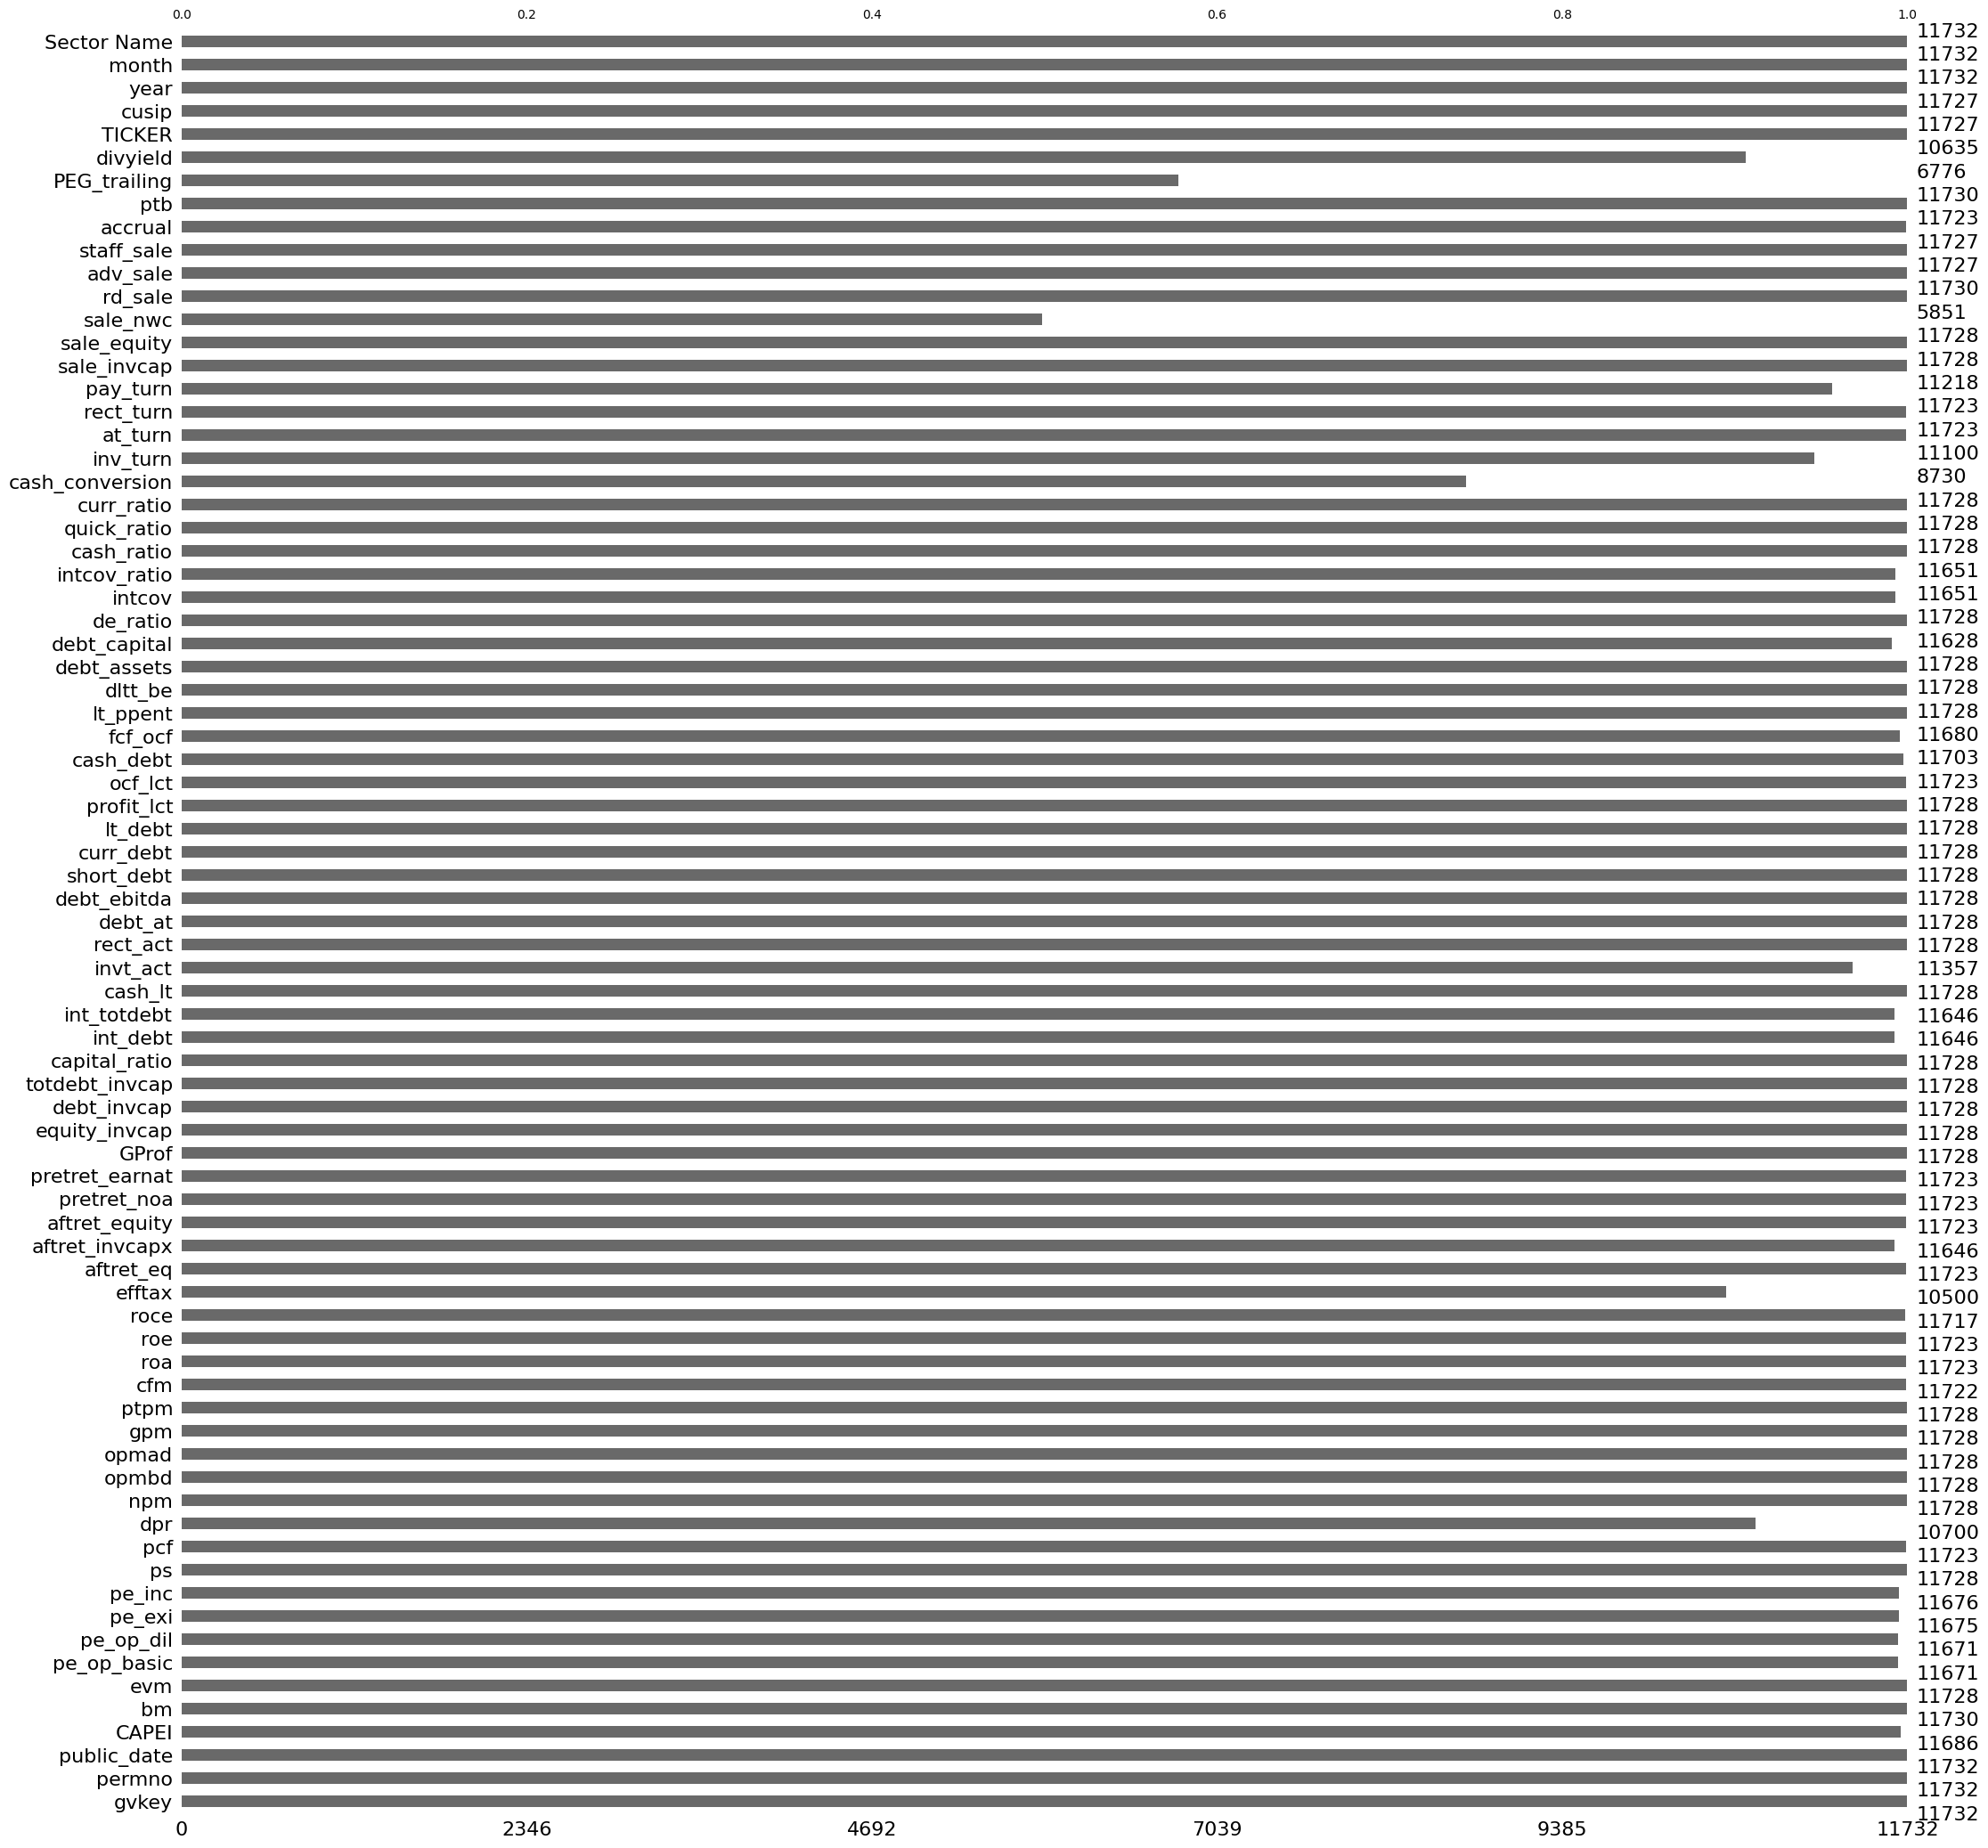

In [ ]:
# Plotting a bar chart of missing values
msno.bar(no_outlier_df)
plt.show()

In [ ]:
# drop the 3 features with more than 20% of missing values
no_outlier_df = no_outlier_df.drop(['PEG_trailing', 'sale_nwc', 'cash_conversion'], axis=1)

# Missing values of dividend could be because the companies don't pay dividend
no_outlier_df['divyield']=no_outlier_df['divyield'].fillna(0)
no_outlier_df['dpr']=no_outlier_df['dpr'].fillna(0)

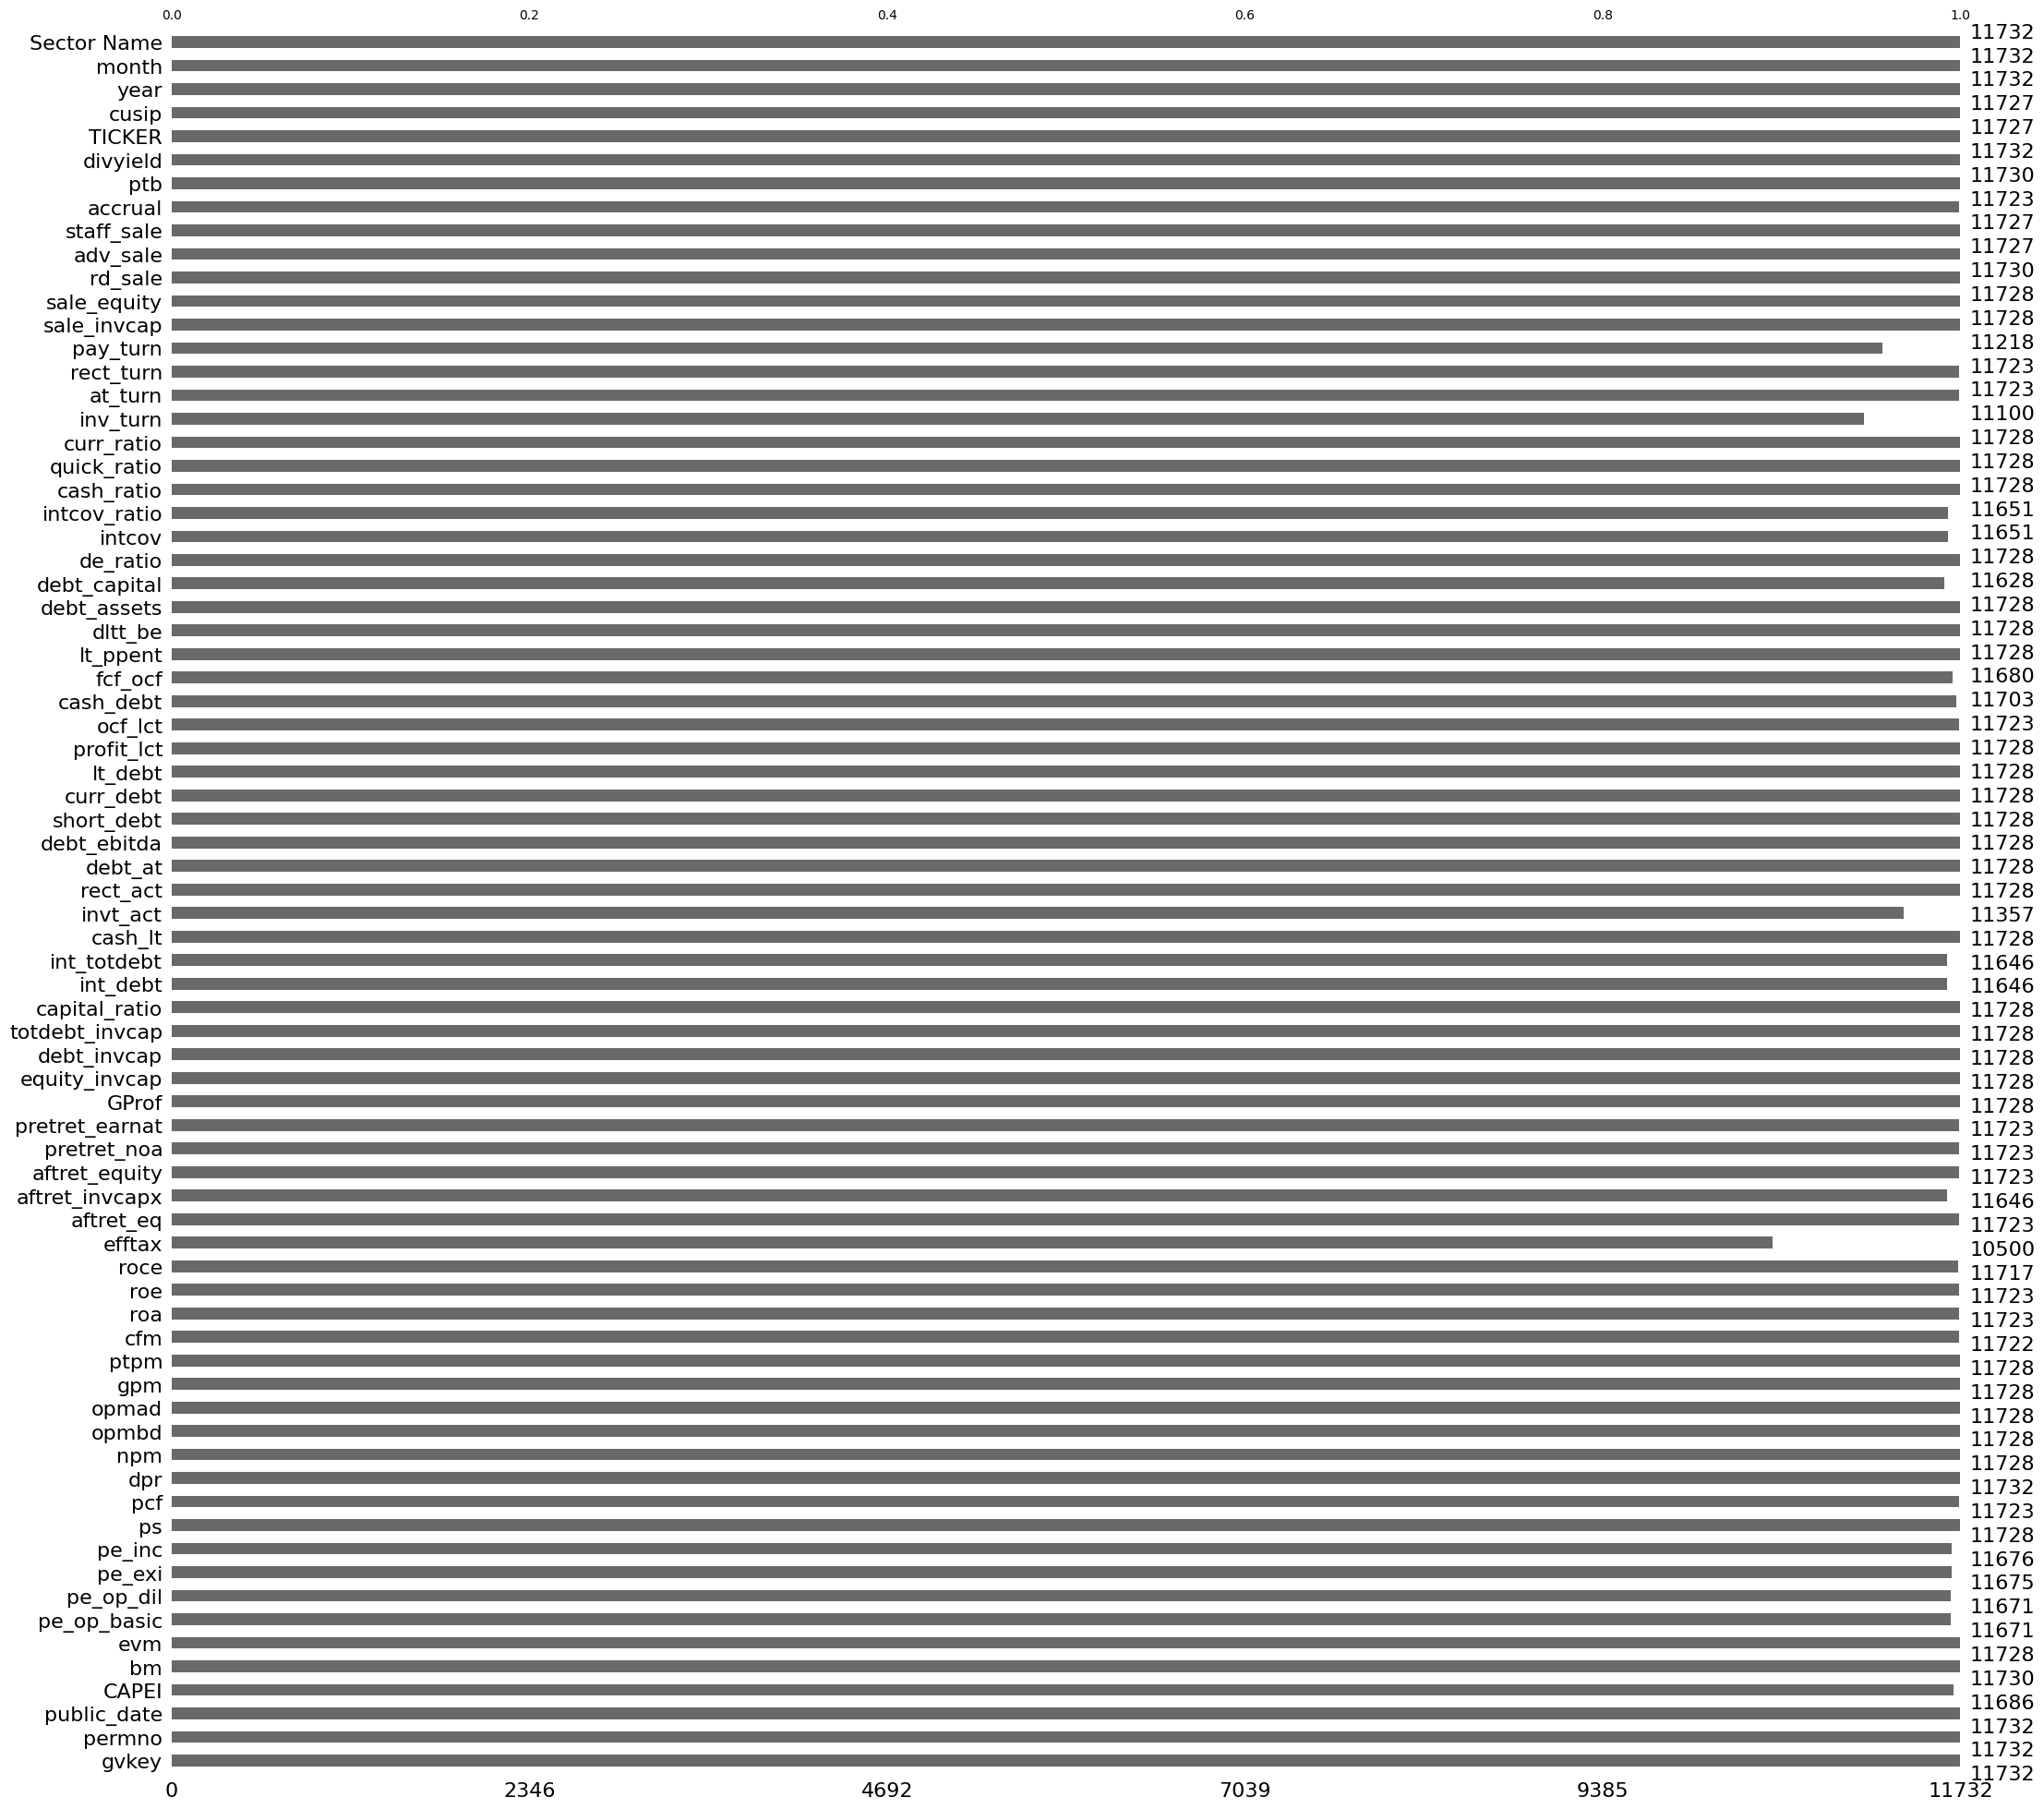

In [ ]:
# Plotting a bar chart of missing values
msno.bar(no_outlier_df)
plt.show()

The next feature with around 1000 missing values is effective tax rate (efftax). This ratio is somehow indirectly involved in other features such as After-tax Return on Average Common Equity (aftret_eq), After-tax Return on Total Stockholders Equity (aftret_equity), After-tax Return on Invested Capital (aftret_invcapx), etc.
Also, it can be obtained from the values of Interest Coverage Ratio (intcov_ratio) and After-tax Interest Coverage (intcov) which shows its correlation. So, it is safe to remove it from the features rather than impuation techniques.

In [ ]:
# drop effective tax rate
no_outlier_df = no_outlier_df.drop(['efftax'], axis=1)

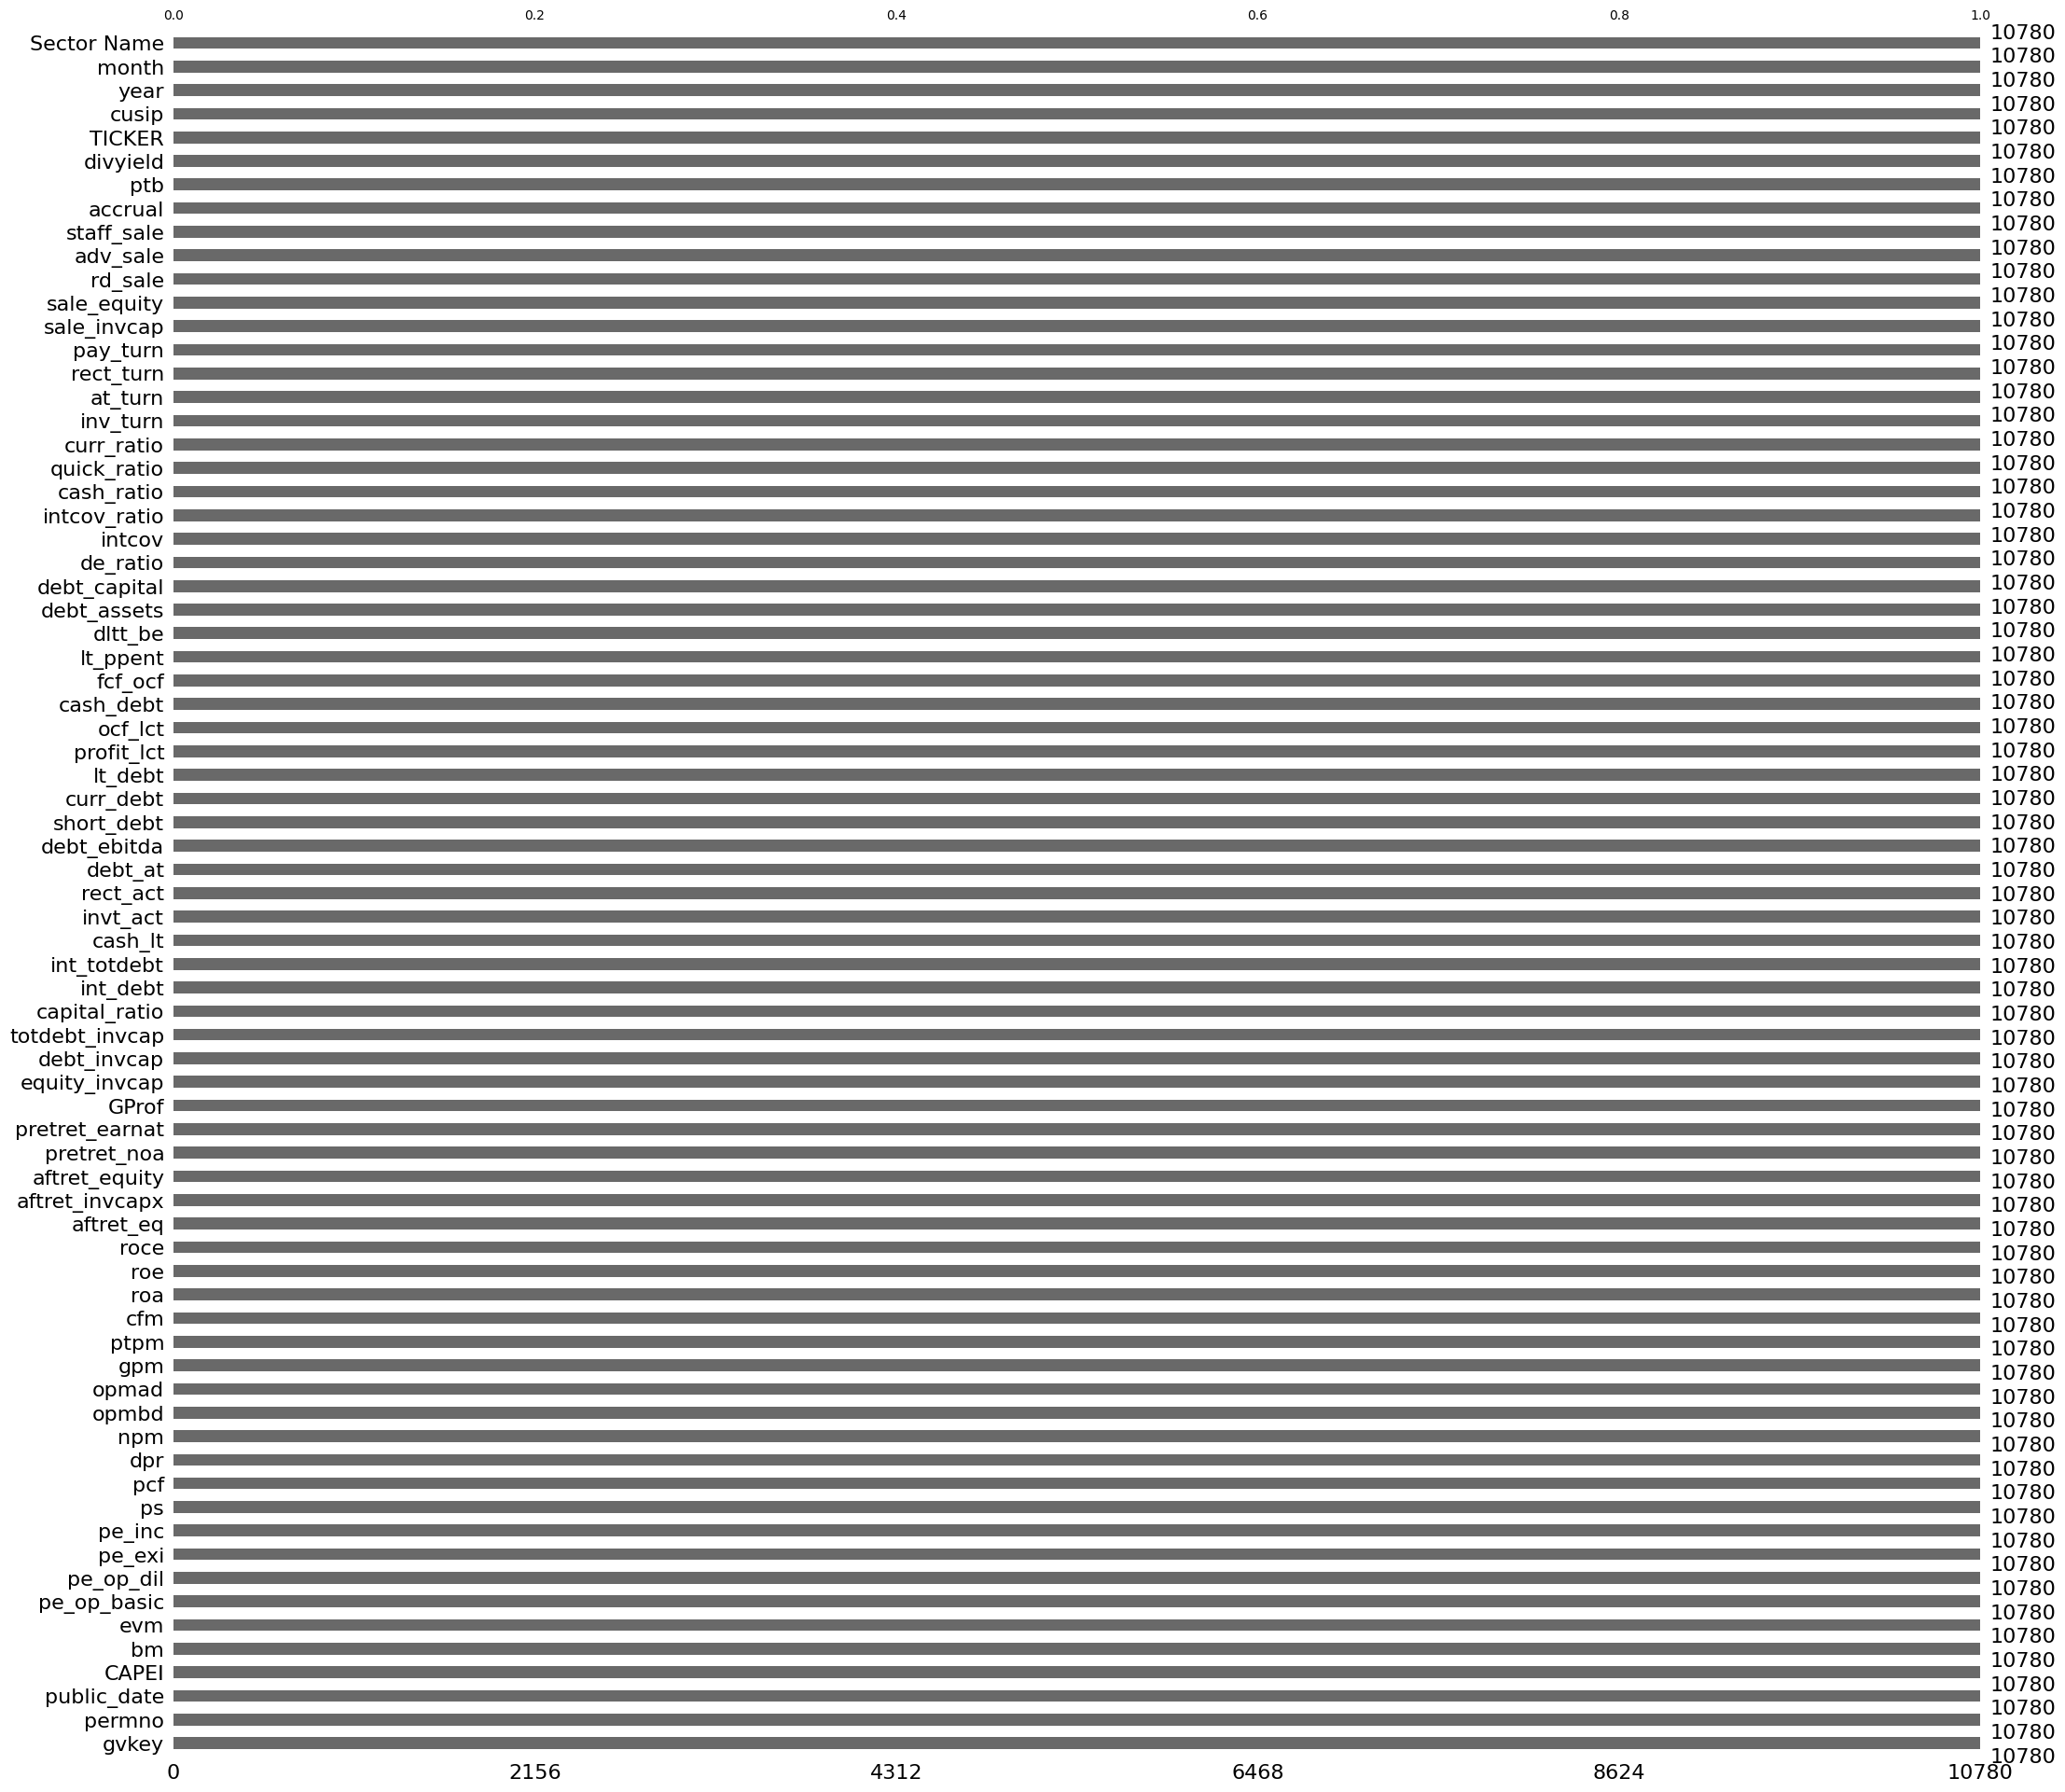

In [ ]:
#the rest of missing values are negligible and we can remove all of them
no_outlier_df.dropna(inplace=True)

# Plotting a bar chart of missing values
msno.bar(no_outlier_df)
plt.show()

# Plotting the features

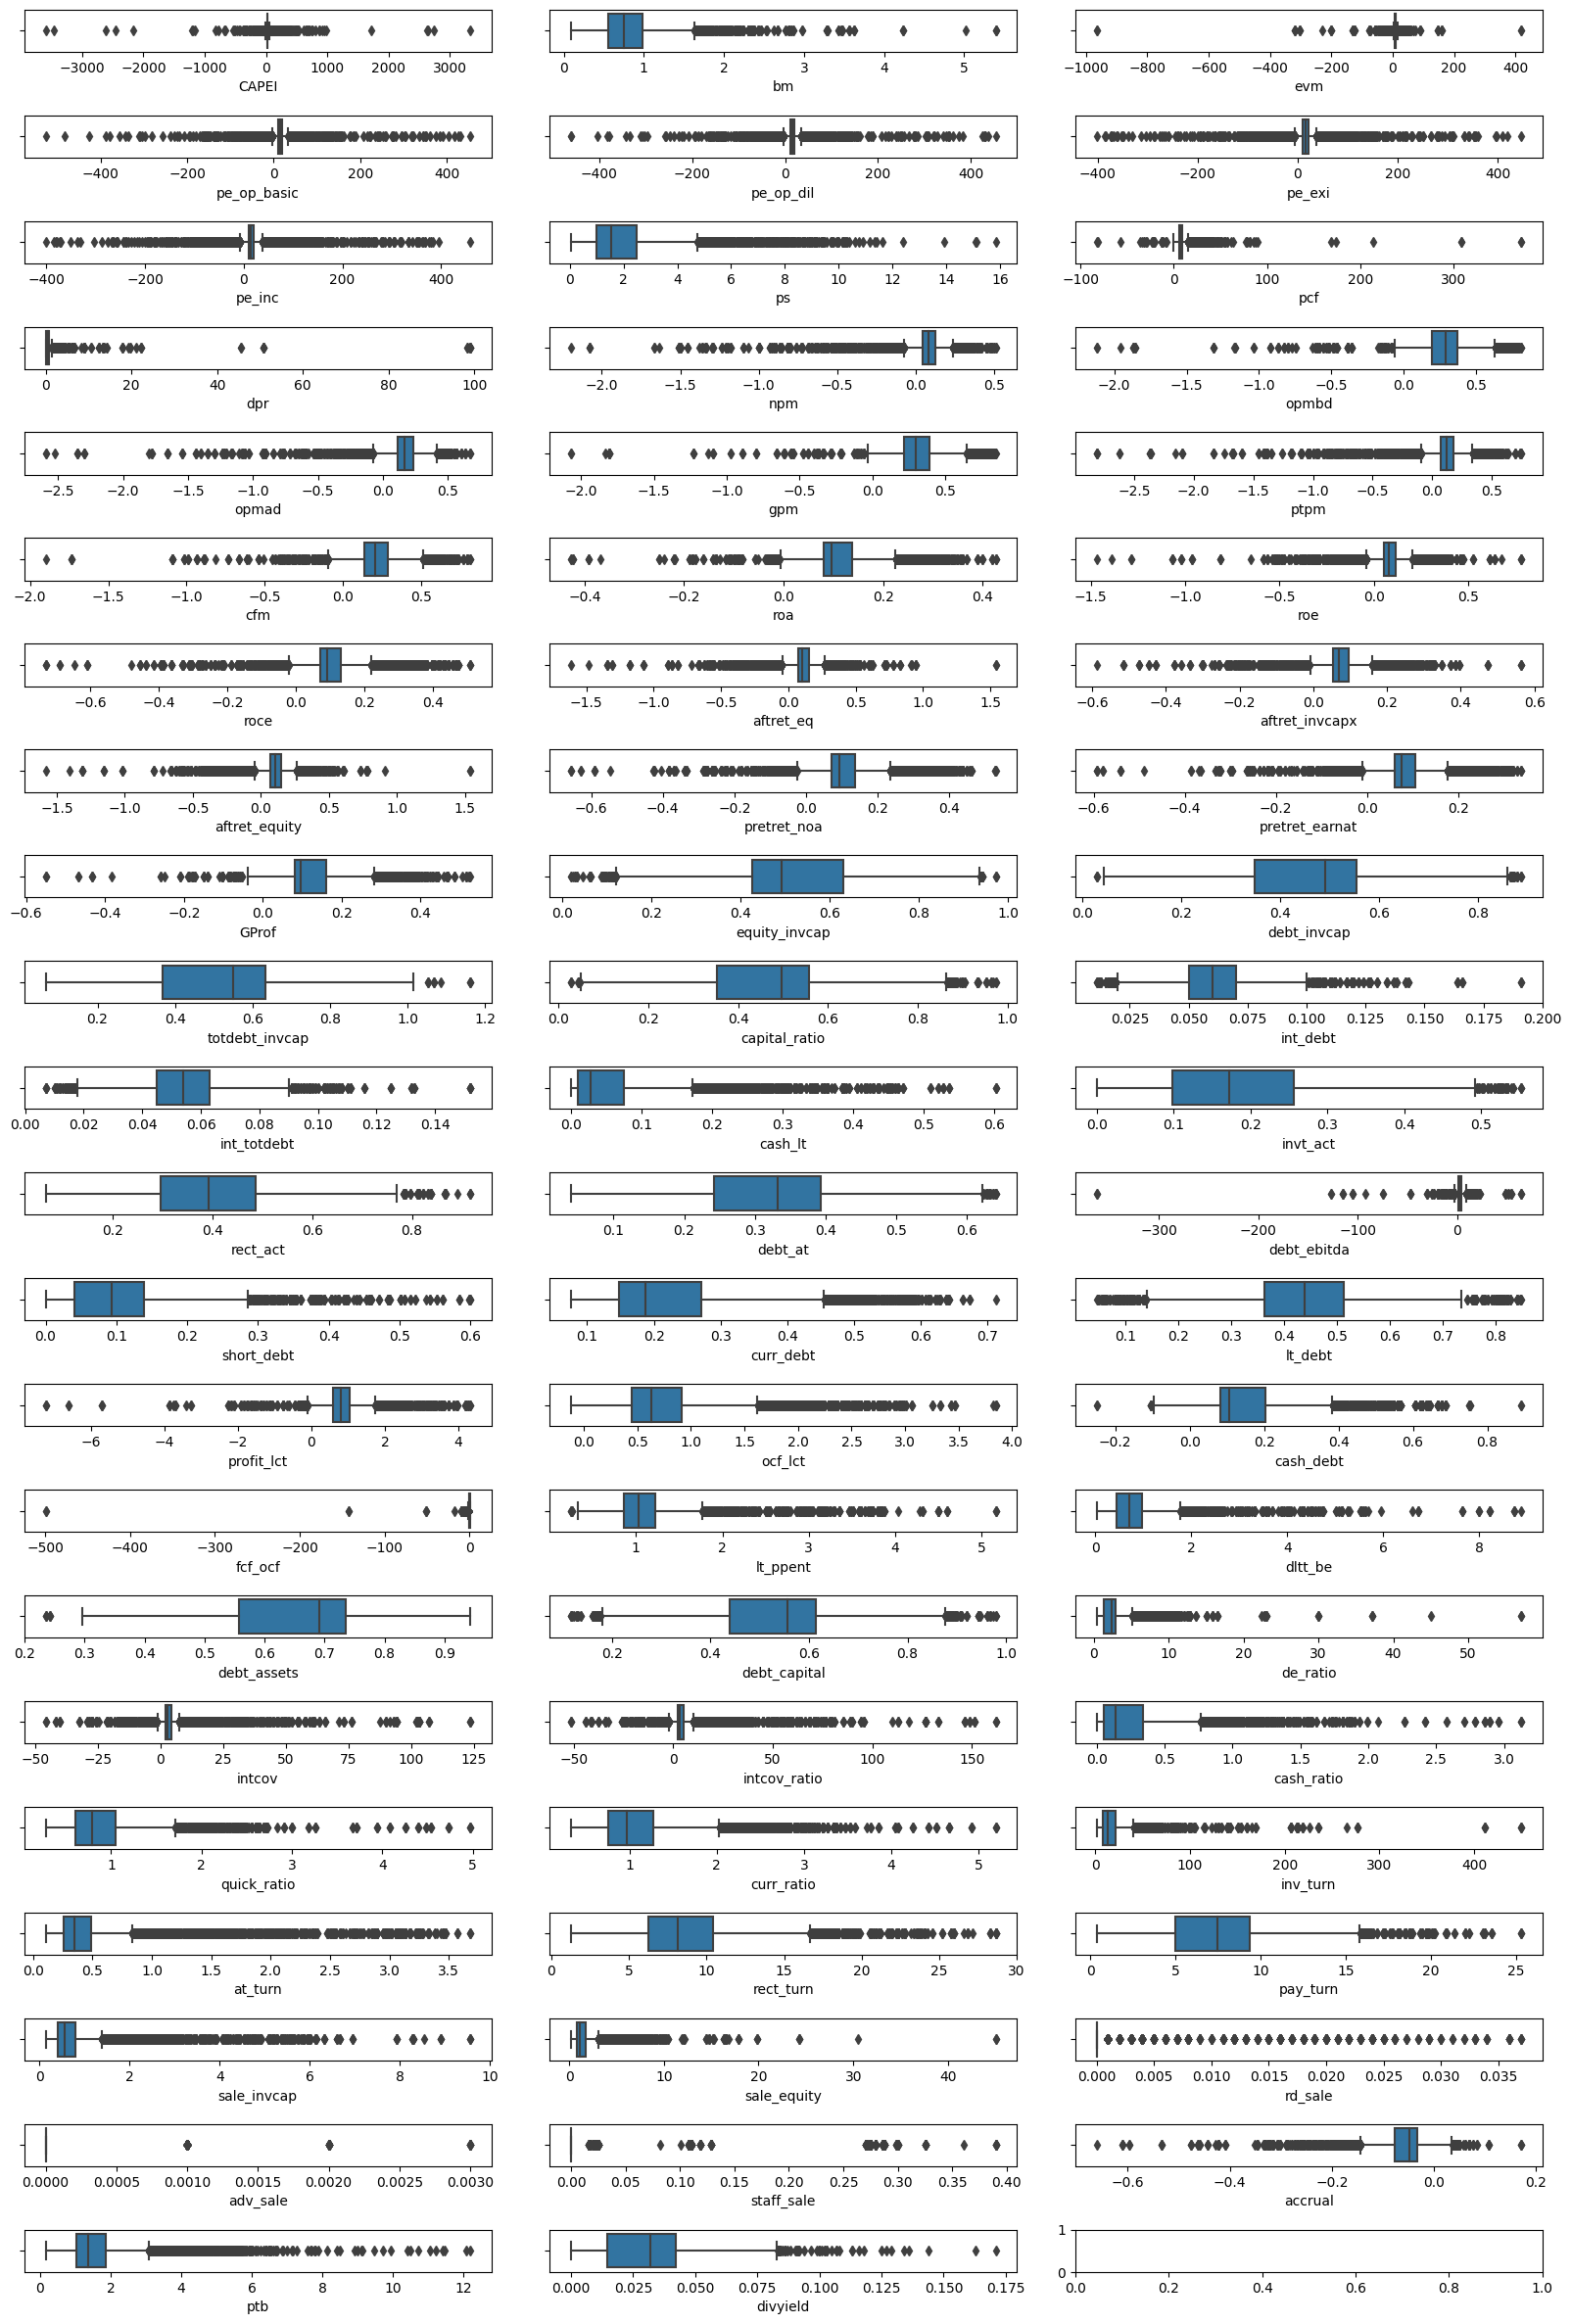

In [ ]:
nrows = math.ceil(len(no_outlier_df.columns.drop(non_usecol_list))/3)
fig, axes = plt.subplots(nrows, 3, figsize=(20, 30))
names = no_outlier_df.columns.drop(non_usecol_list)
fig.subplots_adjust(hspace = 1.5, wspace = 0.125)

# Iterating through axes and names
for name, ax in zip(names, axes.flatten()):
    sns.boxplot(x = no_outlier_df[name], orient='v', ax = ax)

# Scaling the features

In [ ]:
# Example of normalization by group
#------------------------------------------------
def normalize_by_group(df, by):
    groups = df.groupby(by)
    # computes group-wise mean/std,
    # then auto broadcasts to size of group chunk
    mean = groups.transform("mean")
    std = groups.transform("std")
    normalized = (df[mean.columns] - mean) / std
    return normalized
#============================================================================
# You can use the available 'scaler' functions instead of mean/std here
# All you need is to use your normalization/scaling method with ".groupby"
# Here we are grouping by Date
#=============================================================================

In [ ]:
other_features = ['gvkey', 'permno','TICKER', 'cusip', 'year', 'month', 'Sector Name']
numeric_features= no_outlier_df.columns.drop(other_features)
scaled_financials= pd.DataFrame(normalize_by_group(no_outlier_df[numeric_features], 'public_date'))
no_outlier_df[scaled_financials.columns]=scaled_financials

In [ ]:
# The variables on a given date are now centered around 0 with stdev=1
# Check the mean values
no_outlier_df.groupby('public_date').mean().head(5)

,gvkey,permno,CAPEI,bm,evm,pe_op_basic,pe_op_dil,pe_exi,pe_inc,ps,pcf,dpr,npm,opmbd,opmad,gpm,ptpm,cfm,roa,roe,roce,aftret_eq,aftret_invcapx,aftret_equity,pretret_noa,pretret_earnat,GProf,equity_invcap,debt_invcap,totdebt_invcap,capital_ratio,int_debt,int_totdebt,cash_lt,invt_act,rect_act,debt_at,debt_ebitda,short_debt,curr_debt,lt_debt,profit_lct,ocf_lct,cash_debt,fcf_ocf,lt_ppent,dltt_be,debt_assets,debt_capital,de_ratio,intcov,intcov_ratio,cash_ratio,quick_ratio,curr_ratio,inv_turn,at_turn,rect_turn,pay_turn,sale_invcap,sale_equity,rd_sale,adv_sale,staff_sale,accrual,ptb,divyield,year,month
public_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2003-01-31,8004.468085,33286.531915,-3.897591e-17,-1.322819e-16,-1.795254e-16,1.054121e-16,-2.952721e-18,-4.045228e-17,-4.251918e-17,6.732203e-17,-5.433006e-17,-3.779483e-17,-1.511793e-16,-2.232257e-16,1.582658e-16,-2.731267e-18,-4.251918e-17,-1.027547e-16,2.078715e-16,0.000000e+00,6.141659e-17,-1.417306e-17,7.086530e-17,0.000000e+00,-2.456664e-16,2.810990e-16,2.397609e-16,-9.566815e-17,-2.610205e-16,-2.503907e-16,3.744050e-16,2.858234e-16,2.952721e-17,-8.267618e-18,-1.842498e-16,2.267690e-16,-2.267690e-16,-1.748011e-16,-3.425156e-17,-3.779483e-17,-3.873970e-16,3.307047e-17,1.370062e-16,3.070830e-17,-3.307047e-17,-5.669224e-17,6.614095e-17,-6.141659e-16,5.421195e-16,-2.551151e-16,5.078680e-17,-3.307047e-17,4.724353e-17,4.724353e-17,1.715531e-16,2.834612e-17,1.700767e-16,1.181088e-17,-1.287386e-16,6.997948e-17,1.623996e-17,-5.905442e-19,NaN,-8.267618e-18,-4.251918e-17,1.405495e-16,-7.175112e-17,2003.0,1.0
2003-02-28,11331.479167,37145.041667,3.483903e-17,-1.549686e-16,-2.127927e-16,2.746646e-17,-2.052756e-17,2.717733e-17,-2.139492e-17,6.476301e-17,1.775200e-16,9.251859e-18,-5.088522e-17,1.249001e-16,-1.110223e-16,6.707597e-17,-1.549686e-16,1.619075e-17,-1.272131e-16,1.040834e-17,-4.972874e-17,-2.428613e-17,1.121788e-16,-3.411623e-17,9.251859e-18,1.017704e-16,-1.850372e-17,-3.457882e-16,-1.850372e-17,-4.047688e-16,-2.312965e-18,2.775558e-16,-6.661338e-16,0.000000e+00,1.156482e-16,2.312965e-16,-1.711594e-16,-9.251859e-18,8.557969e-17,1.017704e-16,4.163336e-17,1.723159e-16,-1.063964e-16,1.480297e-16,-2.284053e-17,1.665335e-16,6.707597e-17,6.707597e-16,5.319819e-16,9.251859e-18,1.173830e-16,6.245005e-17,-6.823246e-17,3.145632e-16,-2.677257e-16,-9.251859e-18,8.760354e-17,-1.017704e-16,-2.405483e-16,-9.945748e-17,3.816392e-17,1.850372e-17,-1.156482e-17,2.428613e-17,-1.017704e-16,-1.619075e-16,-1.387779e-16,2003.0,2.0
2003-03-31,11065.901961,37637.627451,5.632749e-17,2.122485e-17,-1.980986e-16,2.238133e-17,1.224511e-17,7.183796e-17,-9.796086e-18,1.044916e-16,-1.170088e-17,7.183796e-17,9.088590e-17,-3.700743e-17,1.306145e-17,3.265362e-17,-4.353816e-18,-1.425875e-16,3.700743e-17,-1.322472e-16,-2.786442e-16,8.925322e-17,-5.877651e-17,3.809589e-17,-6.966105e-17,-1.131992e-16,-6.966105e-17,3.483053e-16,2.176908e-17,-2.851749e-16,-4.506199e-16,3.134747e-16,8.707632e-17,1.959217e-16,-1.523836e-16,3.657205e-16,-9.578395e-17,4.136125e-17,2.829980e-17,4.353816e-18,-1.175530e-16,-1.834045e-16,7.836868e-17,-1.306145e-17,1.850372e-17,2.612289e-17,2.176908e-18,-9.360704e-17,5.703499e-16,-1.610912e-16,7.891291e-17,1.088454e-17,6.367456e-17,1.001378e-16,5.659961e-17,-7.619178e-17,-6.639569e-17,-1.654450e-16,1.654450e-16,-5.442270e-18,-1.251722e-16,5.442270e-18,1.088454e-18,2.775558e-17,1.741526e-17,-1.262607e-16,2.089832e-16,2003.0,3.0
2003-04-30,11262.040000,38270.800000,3.608225e-18,6.716849e-17,9.769963e-17,-4.884981e-17,-3.885781e-18,9.547918e-17,-1.276756e-17,1.865175e-16,-2.575717e-16,6.883383e-17,7.327472e-17,2.309264e-16,-6.217249e-17,-6.661338e-18,5.107026e-17,-9.769963e-17,1.709743e-16,6.133982e-17,2.786660e-16,-2.275957e-17,6.217249e-17,-5.662137e-17,1.065814e-16,1.332268e-16,-1.598721e-16,-3.197442e-16,3.774758e-16,-2.886580e-17,-3.219647e-16,4.085621e-16,3.730349e-16,1.154632e-16,-1.065814e-16,-3.552714e-17,2.131628e-16,4.440892e-17,4.662937e-17,8.881784e-17,2.131628e-

In [ ]:
# Check the std values
no_outlier_df.groupby('public_date').std().head(5)

,gvkey,permno,CAPEI,bm,evm,pe_op_basic,pe_op_dil,pe_exi,pe_inc,ps,pcf,dpr,npm,opmbd,opmad,gpm,ptpm,cfm,roa,roe,roce,aftret_eq,aftret_invcapx,aftret_equity,pretret_noa,pretret_earnat,GProf,equity_invcap,debt_invcap,totdebt_invcap,capital_ratio,int_debt,int_totdebt,cash_lt,invt_act,rect_act,debt_at,debt_ebitda,short_debt,curr_debt,lt_debt,profit_lct,ocf_lct,cash_debt,fcf_ocf,lt_ppent,dltt_be,debt_assets,debt_capital,de_ratio,intcov,intcov_ratio,cash_ratio,quick_ratio,curr_ratio,inv_turn,at_turn,rect_turn,pay_turn,sale_invcap,sale_equity,rd_sale,adv_sale,staff_sale,accrual,ptb,divyield,year,month
public_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2003-01-31,5359.283964,21406.510995,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,0.0,0.0
2003-02-28,20012.561198,25066.885963,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
2003-03-31,19443.393439,25053.040667,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
2003-04-30,19590.882751,25051.367650,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
2003-05-31,19193.065647,23368.894048,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0


In [ ]:
# Let's see if we have null values after standardization
number_of_nulls= no_outlier_df.isna().sum()
for feature in number_of_nulls.index:
    if number_of_nulls[feature] !=0:
        print("{} has {} null values".format(feature,number_of_nulls[feature]))

adv_sale has 2900 null values
staff_sale has 3764 null values


It means these two features have a variance of 0 for lots of dates. Therefore, we can remove them from the dataset because they don't contribute to the variability.

In [ ]:
no_outlier_df = no_outlier_df.drop(['adv_sale','staff_sale'], axis=1)

# Merge with Target Variable

In [ ]:
stocks_returns_data.rename(columns={'date':'public_date','PERMNO':'permno','Forward 6M Return':'6m_return'}, inplace=True)
returns_df=stocks_returns_data[['permno','public_date','6m_return']]

In [ ]:
returns_df['year'] = returns_df['public_date'].dt.year
returns_df['month'] = returns_df['public_date'].dt.month
returns_df=returns_df.drop(['public_date'],axis=1)

In [ ]:
cleaned_df = no_outlier_df.merge(returns_df, on=['permno','year', 'month'])
cleaned_df.shape

(10780, 72)

# Labeling the dataset

In [ ]:
median_returns = cleaned_df.groupby('public_date')['6m_return'].transform('median')
cleaned_df['label'] = np.where(cleaned_df['6m_return'] >= median_returns, 1, 0)

In [ ]:
cleaned_df['label'].value_counts()

0    5802
1    4978
Name: label, dtype: int64

In [ ]:
cleaned_df.describe()

,gvkey,permno,CAPEI,bm,evm,pe_op_basic,pe_op_dil,pe_exi,pe_inc,ps,pcf,dpr,npm,opmbd,opmad,gpm,ptpm,cfm,roa,roe,roce,aftret_eq,aftret_invcapx,aftret_equity,pretret_noa,pretret_earnat,GProf,equity_invcap,debt_invcap,totdebt_invcap,capital_ratio,int_debt,int_totdebt,cash_lt,invt_act,rect_act,debt_at,debt_ebitda,short_debt,curr_debt,lt_debt,profit_lct,ocf_lct,cash_debt,fcf_ocf,lt_ppent,dltt_be,debt_assets,debt_capital,de_ratio,intcov,intcov_ratio,cash_ratio,quick_ratio,curr_ratio,inv_turn,at_turn,rect_turn,pay_turn,sale_invcap,sale_equity,rd_sale,accrual,ptb,divyield,year,month,6m_return,label
count,10780.000000,10780.000000,1.078000e+04,1.078000e+04,1.078000e+04,10780.000000,10780.000000,1.078000e+04,1.078000e+04,10780.000000,1.078000e+04,10780.000000,10780.000000,1.078000e+04,1.078000e+04,1.078000e+04,1.078000e+04,1.078000e+04,1.078000e+04,1.078000e+04,1.078000e+04,1.078000e+04,1.078000e+04,1.078000e+04,1.078000e+04,1.078000e+04,1.078000e+04,10780.000000,1.078000e+04,1.078000e+04,1.078000e+04,1.078000e+04,1.078000e+04,10780.000000,10780.000000,1.078000e+04,10780.000000,1.078000e+04,1.078000e+04,1.078000e+04,1.078000e+04,10780.000000,10780.000000,10780.000000,10780.000000,1.078000e+04,1.078000e+04,1.078000e+04,1.078000e+04,1.078000e+04,1.078000e+04,1.078000e+04,1.078000e+04,1.078000e+04,1.078000e+04,1.078000e+04,1.078000e+04,1.078000e+04,10780.000000,10780.000000,10780.000000,1.078000e+04,10780.000000,1.078000e+04,10780.000000,10780.000000,10780.000000,9840.000000,10780.000000
mean,22956.395362,37762.839610,1.054609e-17,-1.054609e-17,5.273044e-18,0.000000,0.000000,5.273044e-18,1.054609e-17,0.000000,2.109218e-17,0.000000,0.000000,1.054609e-17,1.581913e-17,2.109218e-17,-2.636522e-17,-1.054609e-17,-2.109218e-17,-5.273044e-18,1.581913e-17,5.273044e-18,2.636522e-18,9.227828e-18,1.054609e-17,-1.318261e-17,1.054609e-17,0.000000,-1.054609e-17,2.109218e-17,1.054609e-17,1.054609e-17,1.054609e-17,0.000000,0.000000,-2.241044e-17,0.000000,-1.054609e-17,-2.109218e-17,1.054609e-17,3.163827e-17,0.000000,0.000000,0.000000,0.000000,-1.581913e-17,2.636522e-18,-2.109218e-17,-1.054609e-17,1.054609e-17,-5.273044e-18,1.581913e-17,-2.109218e-17,-2.109218e-17,4.218436e-17,-2.109218e-17,-2.109218e-17,-2.109218e-17,0.000000,0.000000,0.000000,5.273044e-18,0.000000,2.109218e-17,0.000000,2011.961503,6.535158,0.074449,0.461781
std,43624.736337,25636.364646,9.888515e-01,9.888515e-01,9.888515e-01,0.988851,0.988851,9.888515e-01,9.888515e-01,0.988851,9.888515e-01,0.988851,0.988851,9.888515e-01,9.888515e-01,9.888515e-01,9.888515e-01,9.888515e-01,9.888515e-01,9.888515e-01,9.888515e-01,9.888515e-01,9.888515e-01,9.888515e-01,9.888515e-01,9.888515e-01,9.888515e-01,0.988851,9.888515e-01,9.888515e-01,9.888515e-01,9.888515e-01,9.888515e-01,0.988851,0.988851,9.888515e-01,0.988851,9.888515e-01,9.888515e-01,9.888515e-01,9.888515e-01,0.988851,0.988851,0.988851,0.988851,9.888515e-01,9.888515e-01,9.888515e-01,9.888515e-01,9.888515e-01,9.888515e-01,9.888515e-01,9.888515e-01,9.888515e-01,9.888515e-01,9.888515e-01,9.888515e-01,9.888515e-01,0.988851,0.988851,0.988851,9.888515e-01,0.988851,9.888515e-01,0.988851,5.626144,3.348177,0.216741,0.498560
min,1075.000000,11404.000000,-6.854949e+00,-2.347782e+00,-6.879912e+00,-7.031660,-7.019907,-6.550281e+00,-6.684533e+00,-2.240485,-5.279799e+00,-1.963327,-5.175163,-5.075828e+00,-5.443560e+00,-5.391022e+00,-4.863118e+00,-5.298693e+00,-5.029370e+00,-5.596581e+00,-4.930465e+00,-5.377421e+00,-5.368885e+00,-5.387846e+00,-4.758425e+00,-4.831745e+00,-5.468804e+00,-2.994682,-3.290733e+00,-3.141418e+00,-3.439012e+00,-4.140073e+00,-3.605441e+00,-1.234909,-1.881594,-3.082126e+00,-2.958157,-6.774817e+00,-1.971854e+00,-1.690068e+00,-3.753660e+00,-5.437664,-1.910305,-4.757557,-7.136463,-2.446522e+00,-2.393426e+00,-3.648662e+00,-3.382736e+00,-1.906006e+00,-5.136147e+00,-4.880585e+00,-1.320208e+00,-2.035018e+00,-1.940608e+00,-1.747203e+00,-1.249283e+00,-2.501066e+00,-2.624261,-1.749615,-1.760959,-4.798129e-01,-5.060441,-2.337500e+00,-2.614762,2003.000000,1

In [ ]:
cleaned_df = pd.read_csv('cleaned_df.csv')
all_years = cleaned_df['year'].unique()

In [ ]:
prediction_df= cleaned_df[(cleaned_df['year']==2022) & (cleaned_df['month']>6)]
train_df= cleaned_df[~((cleaned_df['year']==2022) & (cleaned_df['month']>6))]

## Importing the required libraries

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import f1_score, make_scorer, precision_score
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import VarianceThreshold
import category_encoders as ce
from category_encoders.wrapper import PolynomialWrapper
import optuna

##Model Assessment Metrics

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,roc_auc_score,classification_report,roc_auc_score,roc_curve,auc

def model(algorithm,dtrain_X,dtrain_Y,dtest_X,dtest_Y):

    algorithm.fit(dtrain_X,dtrain_Y)
    predictions = algorithm.predict(dtest_X)
    print (algorithm)

    print ("Accuracy score : ", accuracy_score(predictions,dtest_Y))
    print ("Recall score   : ", recall_score(predictions,dtest_Y))
    print ("classification report :\n",classification_report(predictions,dtest_Y))

    fig = plt.figure(figsize=(6,4))
    ax  = fig.add_subplot(111)
    prediction_probabilities = algorithm.predict_proba(dtest_X)[:,1]
    fpr , tpr , thresholds   = roc_curve(dtest_Y,prediction_probabilities)
    ax.plot(fpr,tpr,label   = ["Area under curve : ",auc(fpr,tpr)],linewidth=2,linestyle="dotted")
    ax.plot([0,1],[0,1],linewidth=2,linestyle="dashed")
    plt.legend(loc="best")
    plt.title("ROC-CURVE & AREA UNDER CURVE")

## Trial 1: Catboost using all the historical data from 2003

In this step, we try to develop models and validate them by making predictions from 2015 ahead. In each stage of the validation, we add one year to the training dataset and predict the labels for the next year!
The final model is then tested on the 2nd half of 2022!

In [ ]:
Tcat_cols = ['TICKER','Sector Name']
cleaned_df[cat_cols]=cleaned_df[cat_cols].astype('category')

def objective_dt(trial, df, years):

    hyper_params = {

        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1, log=True),
        "max_depth": trial.suggest_int("max_depth", 2, 8),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1e-8, 100.0, log=True),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 50, 100, step=2),
        'verbose':0,
        'cat_features': cat_cols,
        "random_state": 77,
        "n_estimators": trial.suggest_int("n_estimators", 200, 400, step=100)
        }


    clf = CatBoostClassifier(**hyper_params)

    auc_scores=[]
    for year in years[-7:-1]:
      X_train=df.drop(['gvkey','permno','public_date','cusip',
                         '6m_return','label'],axis=1)[df['year'].isin(years[years<year])]
      y_train=df['label'][df['year'].isin(years[years<year])]

      condition_val= (df['year']==year) & (df['month']<=6)
      X_val=df.drop(['gvkey','permno','public_date','cusip',
                             '6m_return','label'],axis=1)[condition_val]
      y_val=df['label'][condition_val]

      clf.fit(X_train,y_train)
      y_pred= clf.predict(X_val)
      metric = roc_auc_score(y_val, y_pred)
      auc_scores=auc_scores+[metric]

    auc_mean=np.mean(auc_scores)
    return auc_mean

In [ ]:
study1 = optuna.create_study(direction="maximize")

[I 2023-08-04 14:05:24,788] A new study created in memory with name: no-name-6a5141a1-ed2b-4c6b-af72-2023c69b7002


In [ ]:
study1.optimize(lambda trial: objective_dt(trial, cleaned_df, all_years), n_trials=50,  gc_after_trial=True)

[I 2023-08-04 14:06:56,507] Trial 0 finished with value: 0.6008727942416041 and parameters: {'learning_rate': 0.001507645147071388, 'max_depth': 6, 'l2_leaf_reg': 34.21608736154924, 'min_data_in_leaf': 78, 'n_estimators': 300}. Best is trial 0 with value: 0.6008727942416041.
[I 2023-08-04 14:07:11,580] Trial 1 finished with value: 0.5995833819176286 and parameters: {'learning_rate': 0.009080742870979583, 'max_depth': 3, 'l2_leaf_reg': 0.003864632808658483, 'min_data_in_leaf': 54, 'n_estimators': 200}. Best is trial 0 with value: 0.6008727942416041.
[I 2023-08-04 14:07:42,859] Trial 2 finished with value: 0.600409919161082 and parameters: {'learning_rate': 0.08619242332390048, 'max_depth': 3, 'l2_leaf_reg': 0.6930782959422046, 'min_data_in_leaf': 90, 'n_estimators': 400}. Best is trial 0 with value: 0.6008727942416041.
[I 2023-08-04 14:08:20,799] Trial 3 finished with value: 0.5893850999876092 and parameters: {'learning_rate': 0.024853668856015147, 'max_depth': 5, 'l2_leaf_reg': 0.07017

### Trial 1- Best Result:

In [ ]:
hyper_params = {

        'learning_rate': 0.07620458957186135,
        "max_depth": 5,
        "l2_leaf_reg": 3.763395352166603e-06,
        "min_data_in_leaf": 70,
        'verbose':0,
        'cat_features': cat_cols,
        "random_state": 77,
        "n_estimators": 400
        }


clf = CatBoostClassifier(**hyper_params)

X_train=train_df.drop(['gvkey','permno','public_date','cusip',
                         '6m_return','label'],axis=1)[train_df['year'].isin(all_years[all_years<2022])]
y_train=train_df['label'][train_df['year'].isin(all_years[all_years<2022])]

clf.fit(X_train,y_train)

In [ ]:
test_X=train_df.drop(['gvkey','permno','public_date','cusip',
                   '6m_return','label'],axis=1)[train_df['year']==2022]
test_y=train_df['label'][train_df['year']==2022]

In [ ]:
y_hat=clf.predict(test_X)
print ("Accuracy score : ", accuracy_score(y_hat,test_y))
cm_catboost = confusion_matrix(test_y, y_hat)
print("Confusion Matrix:")
print(cm_catboost)

Accuracy score :  0.4074074074074074
Confusion Matrix:
[[46 71]
 [57 42]]


Accuracy score :  0.4074074074074074
Recall score   :  0.37168141592920356
classification report :
               precision    recall  f1-score   support

           0       0.39      0.45      0.42       103
           1       0.42      0.37      0.40       113

    accuracy                           0.41       216
   macro avg       0.41      0.41      0.41       216
weighted avg       0.41      0.41      0.41       216



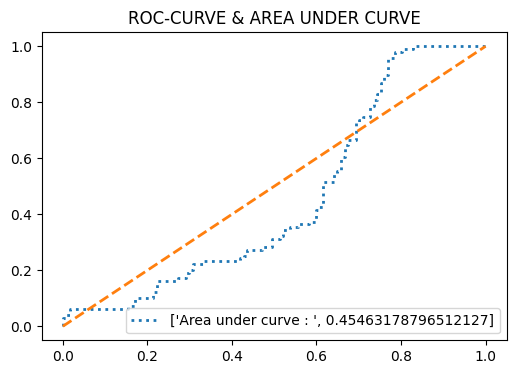

In [ ]:
model(clf,X_train, y_train, test_X, test_y)

## Trial 2: Catboost using all the historical data from 2003

In this trial, we remove 2008 from our training dataset to see if it results in any kind of improvement.

In [ ]:
cat_cols = ['TICKER','Sector Name']
train_df[cat_cols]=train_df[cat_cols].astype('category')
prediction_df[cat_cols]=prediction_df[cat_cols].astype('category')

new_train_df=train_df[~(train_df['year']==2008)]

def objective_dt(trial, df, years):

    hyper_params = {

        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1, log=True),
        "max_depth": trial.suggest_int("max_depth", 2, 8),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1e-8, 100.0, log=True),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 50, 100, step=2),
        'verbose':0,
        'cat_features': cat_cols,
        "random_state": 77,
        "n_estimators": trial.suggest_int("n_estimators", 200, 400, step=100)
        }


    clf = CatBoostClassifier(**hyper_params)

    auc_scores=[]
    for year in years[-7:-1]:
      X_train=df.drop(['gvkey','permno','public_date','cusip',
                         '6m_return','label'],axis=1)[df['year'].isin(years[years<year])]
      y_train=df['label'][df['year'].isin(years[years<year])]

      condition_val= (df['year']==year)
      X_val=df.drop(['gvkey','permno','public_date','cusip',
                             '6m_return','label'],axis=1)[condition_val]
      y_val=df['label'][condition_val]

      clf.fit(X_train,y_train)
      y_pred= clf.predict(X_val)
      metric = roc_auc_score(y_val, y_pred)
      auc_scores=auc_scores+[metric]

    auc_mean=np.mean(auc_scores)
    return auc_mean

In [ ]:
study2 = optuna.create_study(direction="maximize")

[I 2023-08-04 14:57:42,595] A new study created in memory with name: no-name-d7e70e86-23e3-41b6-827a-ea6ca7c0d22a


In [ ]:
study2.optimize(lambda trial: objective_dt(trial, new_train_df, all_years), n_trials=50,  gc_after_trial=True)

[I 2023-08-04 15:00:46,310] Trial 0 finished with value: 0.5733864079132568 and parameters: {'learning_rate': 0.0023402937953050616, 'max_depth': 6, 'l2_leaf_reg': 0.003939567182891617, 'min_data_in_leaf': 68, 'n_estimators': 300}. Best is trial 0 with value: 0.5733864079132568.
[I 2023-08-04 15:01:20,214] Trial 1 finished with value: 0.5738669227877454 and parameters: {'learning_rate': 0.0032970657291963865, 'max_depth': 5, 'l2_leaf_reg': 1.9684306165600796, 'min_data_in_leaf': 100, 'n_estimators': 300}. Best is trial 1 with value: 0.5738669227877454.
[I 2023-08-04 15:02:10,432] Trial 2 finished with value: 0.5854986287694777 and parameters: {'learning_rate': 0.01998960643683886, 'max_depth': 6, 'l2_leaf_reg': 0.004425389480406829, 'min_data_in_leaf': 84, 'n_estimators': 300}. Best is trial 2 with value: 0.5854986287694777.
[I 2023-08-04 15:02:31,443] Trial 3 finished with value: 0.5899558228349185 and parameters: {'learning_rate': 0.07461030490810414, 'max_depth': 2, 'l2_leaf_reg': 2

## Trial 2- Best Result

In [ ]:

hyper_params = {

        'learning_rate': 0.0868003798458417,
        "max_depth": 3,
        "l2_leaf_reg":  46.25292272595254,
        "min_data_in_leaf": 96,
        'verbose':0,
        'cat_features': cat_cols,
        "random_state": 77,
        "n_estimators": 300
        }


clf = CatBoostClassifier(**hyper_params)

X_train=new_train_df.drop(['gvkey','permno','public_date','cusip',
                         '6m_return','label'],axis=1)[train_df['year'].isin(all_years[all_years<2022])]
y_train=new_train_df['label'][train_df['year'].isin(all_years[all_years<2022])]

clf.fit(X_train,y_train)

In [ ]:
test_X=new_train_df.drop(['gvkey','permno','public_date','cusip',
                   '6m_return','label'],axis=1)[new_train_df['year']==2022]
test_y=new_train_df['label'][new_train_df['year']==2022]

In [ ]:
y_hat=clf.predict(test_X)
print ("Accuracy score : ", accuracy_score(y_hat,test_y))
cm_catboost = confusion_matrix(test_y, y_hat)
print("Confusion Matrix:")
print(cm_catboost)

Accuracy score :  0.46296296296296297
Confusion Matrix:
[[49 68]
 [48 51]]


Accuracy score :  0.46296296296296297
Recall score   :  0.42857142857142855
classification report :
               precision    recall  f1-score   support

           0       0.42      0.51      0.46        97
           1       0.52      0.43      0.47       119

    accuracy                           0.46       216
   macro avg       0.47      0.47      0.46       216
weighted avg       0.47      0.46      0.46       216



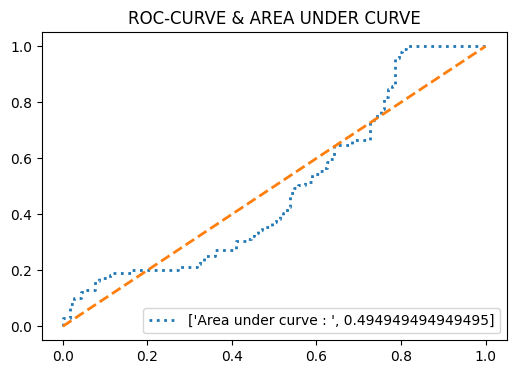

In [ ]:
model(clf,X_train, y_train, test_X, test_y)

In both previous trials, we didn't get anything better than random classifiers.

##Trial 3- Catboost with a moving window

In this step, we use a moving window of 2-year training dataset and predict the labels for the upcoming year. We do it for the past 10 years!

In [ ]:
last10_years=all_years[all_years>2012]
last10_years[2:-1]

array([2015, 2016, 2017, 2018, 2019, 2020, 2021])

In [ ]:
cat_cols = ['TICKER','Sector Name']
train_df[cat_cols]=train_df[cat_cols].astype('category')
prediction_df[cat_cols]=prediction_df[cat_cols].astype('category')
last10_years=all_years[all_years>2012]

def objective_dt(trial, df, years):

    hyper_params = {

        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1, log=True),
        "max_depth": trial.suggest_int("max_depth", 2, 8),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1e-8, 100.0, log=True),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 50, 100, step=2),
        'verbose':0,
        'cat_features': cat_cols,
        "random_state": 77,
        "n_estimators": trial.suggest_int("n_estimators", 200, 400, step=100)
        }


    clf = CatBoostClassifier(**hyper_params)

    auc_scores=[]
    for year in years[2:-1]:
      X_train=df.drop(['gvkey','permno','public_date','cusip',
                         '6m_return','label'],axis=1)[df['year'].isin(years[years<year][-2:])]
      y_train=df['label'][df['year'].isin(years[years<year][-2:])]

      condition_val= (df['year']==year)
      X_val=df.drop(['gvkey','permno','public_date','cusip',
                             '6m_return','label'],axis=1)[condition_val]
      y_val=df['label'][condition_val]

      clf.fit(X_train,y_train)
      y_pred= clf.predict(X_val)
      metric = roc_auc_score(y_val, y_pred)
      auc_scores=auc_scores+[metric]

    auc_mean=np.mean(auc_scores)
    return auc_mean

In [ ]:
study3 = optuna.create_study(direction="maximize")

[I 2023-08-04 17:39:46,248] A new study created in memory with name: no-name-7b3441c6-9aff-4948-a7f7-588d6d32adb0


In [ ]:
study3.optimize(lambda trial: objective_dt(trial, train_df, last10_years), n_trials=50,  gc_after_trial=True)

[I 2023-08-04 17:40:52,364] Trial 0 finished with value: 0.5621091200641016 and parameters: {'learning_rate': 0.013384744888683612, 'max_depth': 7, 'l2_leaf_reg': 3.24398860951745, 'min_data_in_leaf': 94, 'n_estimators': 200}. Best is trial 0 with value: 0.5621091200641016.
[I 2023-08-04 17:41:10,452] Trial 1 finished with value: 0.5641791410995661 and parameters: {'learning_rate': 0.007099704151256356, 'max_depth': 3, 'l2_leaf_reg': 4.803530214503211e-08, 'min_data_in_leaf': 74, 'n_estimators': 400}. Best is trial 1 with value: 0.5641791410995661.
[I 2023-08-04 17:41:22,585] Trial 2 finished with value: 0.5615447912143028 and parameters: {'learning_rate': 0.025875514282916682, 'max_depth': 4, 'l2_leaf_reg': 0.2594261974268379, 'min_data_in_leaf': 62, 'n_estimators': 200}. Best is trial 1 with value: 0.5641791410995661.
[I 2023-08-04 17:43:02,938] Trial 3 finished with value: 0.55343785499666 and parameters: {'learning_rate': 0.07025232665956571, 'max_depth': 7, 'l2_leaf_reg': 6.483986

## Trial 3- Best Results

In [ ]:
hyper_params = {

        'learning_rate': 0.009245549410603364,
        "max_depth": 6,
        "l2_leaf_reg":  0.010527649897106714,
        "min_data_in_leaf": 80,
        'verbose':0,
        'cat_features': cat_cols,
        "random_state": 77,
        "n_estimators": 200
        }


clf = CatBoostClassifier(**hyper_params)

X_train=new_train_df.drop(['gvkey','permno','public_date','cusip',
                         '6m_return','label'],axis=1)[train_df['year'].isin(all_years[all_years<2022][-2:])]
y_train=new_train_df['label'][train_df['year'].isin(all_years[all_years<2022][-2:])]

clf.fit(X_train,y_train)

In [ ]:
test_X=new_train_df.drop(['gvkey','permno','public_date','cusip',
                   '6m_return','label'],axis=1)[new_train_df['year']==2022]
test_y=new_train_df['label'][new_train_df['year']==2022]

In [ ]:
y_hat=clf.predict(test_X)
print ("Accuracy score : ", accuracy_score(y_hat,test_y))
cm_catboost = confusion_matrix(test_y, y_hat)
print("Confusion Matrix:")
print(cm_catboost)

Accuracy score :  0.6157407407407407
Confusion Matrix:
[[86 31]
 [52 47]]


Accuracy score :  0.6157407407407407
Recall score   :  0.6025641025641025
classification report :
               precision    recall  f1-score   support

           0       0.74      0.62      0.67       138
           1       0.47      0.60      0.53        78

    accuracy                           0.62       216
   macro avg       0.60      0.61      0.60       216
weighted avg       0.64      0.62      0.62       216



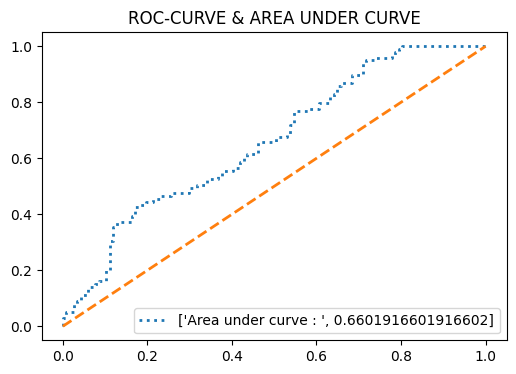

In [ ]:
model(clf,X_train, y_train, test_X, test_y)

The model shows some predictive power, so we use this one for predicting finding the top 15 high performing stocks!

In [ ]:
prediction_X=prediction_df.drop(['gvkey','permno','public_date','cusip',
                   '6m_return','label'],axis=1)
y_predict=clf.predict(prediction_X)

In [ ]:
new2022_df=prediction_df
new2022_df['prediction']=y_predict
new2022_df

,gvkey,permno,public_date,CAPEI,bm,evm,pe_op_basic,pe_op_dil,pe_exi,pe_inc,ps,pcf,dpr,npm,opmbd,opmad,gpm,ptpm,cfm,roa,roe,roce,aftret_eq,aftret_invcapx,aftret_equity,pretret_noa,pretret_earnat,GProf,equity_invcap,debt_invcap,totdebt_invcap,capital_ratio,int_debt,int_totdebt,cash_lt,invt_act,rect_act,debt_at,debt_ebitda,short_debt,curr_debt,lt_debt,profit_lct,ocf_lct,cash_debt,fcf_ocf,lt_ppent,dltt_be,debt_assets,debt_capital,de_ratio,intcov,intcov_ratio,cash_ratio,quick_ratio,curr_ratio,inv_turn,at_turn,rect_turn,pay_turn,sale_invcap,sale_equity,rd_sale,accrual,ptb,divyield,TICKER,cusip,year,month,Sector Name,6m_return,label,prediction
224,3413,11404,2022-08-31,0.092035,0.898729,0.064114,0.046268,0.032054,0.005216,0.039891,-0.084336,0.145567,-0.055570,-0.245303,-0.152661,-0.251778,-0.253269,-0.349257,-0.256105,-0.592664,-0.566787,-0.624023,-0.471372,-0.613583,-0.551417,-0.705034,-0.633372,-0.625984,-0.042058,0.224105,0.210142,0.170851,-0.189566,-0.272342,-0.608493,-0.901477,0.456096,0.244677,0.385704,0.005870,-0.739184,0.207622,-0.298051,-0.392334,-0.612054,-0.140144,-0.199499,-0.262683,0.218034,0.061980,-0.172885,-0.435648,-0.447397,-0.462944,0.167553,-0.056087,0.700529,-0.448966,-1.082011,0.233564,-0.408315,-0.461564,-0.243526,0.710022,-0.791923,0.199743,ED,20911510,2022,8,Utilities,NaN,0,1
225,3413,11404,2022-09-30,0.089920,0.868626,0.016746,0.012730,-0.002146,-0.042932,-0.010462,-0.194761,0.086052,-0.060344,-0.307120,-0.305600,-0.350615,-0.402129,-0.404998,-0.386945,-0.552275,-0.490967,-0.565170,-0.397472,-0.538205,-0.465112,-0.634264,-0.569589,-0.583052,-0.031213,0.215014,0.197357,0.161515,-0.105590,-0.191591,-0.586277,-0.823880,0.554801,0.244064,0.322605,-0.001227,-0.714597,0.191916,-0.324396,-0.406311,-0.580438,-0.052937,-0.167845,-0.269678,0.227426,0.094859,-0.173445,-0.420968,-0.437158,-0.477042,0.153316,-0.035769,0.806654,-0.534458,-1.035063,0.411493,-0.522296,-0.521869,-0.253837,0.687976,-0.767141,0.236696,ED,20911510,2022,9,Utilities,NaN,0,1
226,3413,11404,2022-10-31,0.087722,0.898729,0.064114,-0.026715,-0.040046,-0.043925,-0.017247,-0.206298,-0.044997,-0.055570,-0.245303,-0.152661,-0.251778,-0.253269,-0.349257,-0.256105,-0.592664,-0.566787,-0.624023,-0.471372,-0.613583,-0.551417,-0.705034,-0.633372,-0.625984,-0.042058,0.224105,0.210142,0.170851,-0.189566,-0.272342,-0.608493,-0.901477,0.456096,0.244677,0.385704,0.005870,-0.739184,0.207622,-0.298051,-0.392334,-0.612054,-0.140144,-0.199499,-0.262683,0.218034,0.061980,-0.172885,-0.435648,-0.447397,-0.462944,0.167553,-0.056087,0.700529,-0.448966,-1.082011,0.233564,-0.408315,-0.461564,-0.243526,0.710022,-0.818426,0.293580,ED,20911510,2022,10,Utilities,NaN,0,1
227,3413,11404,2022-11-30,0.170975,1.056301,0.058721,0.074942,0.061244,0.282410,0.321907,0.175131,-0.328756,-0.011931,-0.101791,0.018641,-0.120317,-0.105945,-0.152330,-0.070129,-0.455483,-0.488971,-0.516873,-0.431730,-0.529863,-0.473994,-0.573855,-0.529920,-0.469825,0.238022,-0.029593,-0.010350,-0.085965,-0.888000,-0.768337,-0.493668,-1.079854,0.603789,0.047806,0.233874,0.106800,-0.585001,0.127363,-0.186753,-0.100445,-0.427080,0.326569,-0.340480,-0.374013,-0.046263,-0.206345,-0.324404,-0.319802,-0.333139,-0.419337,0.205034,-0.083380,0.758504,-0.424158,-1.085516,0.214634,-0.412297,-0.497716,-0.252573,0.048083,-0.735785,-0.007851,ED,20911510,2022,11,Utilities,NaN,0,1
457,3897,11674,2022-07-31,0.255738,-0.535180,0.323434,0.122124,0.119634,0.129406,0.134817,-0.587614,-0.340949,-0.139312,-0.686702,-0.849187,-0.783264,-0.935696,-0.836340,-0.796050,-0.604671,-0.460442,-0.628126,-0.409045,-0.537745,-0.457663,-0.649129,-0.581258,-0.678789,-0.657902,0.960006,1.035391,0.856870,-0.521333,-0.610629,-0.505217,0.260683,-0.206620,0.798280,0.772664,0.584217,-0.660346,0.161245,-0.480759,-0.340242,-0.365330,-0.225891,0.113287,0.382124,0.965197,0.847165,0.681433,-0.472299,-0.469573,-0.316836,-0.417103,-0.364620,-0.007003,-0.211307,0.601023,1.150901,-0.154434,0.090817,-0.263270,0.131716,0.138668,-0.167092,DTE,23333110,2022,7,Utilities

In [ ]:
best_stocks=new2022_df.groupby('TICKER').sum()
best_stocks.sort_values(by='prediction', ascending=False, inplace=True)
best_stocks.head(15)

,gvkey,permno,CAPEI,bm,evm,pe_op_basic,pe_op_dil,pe_exi,pe_inc,ps,pcf,dpr,npm,opmbd,opmad,gpm,ptpm,cfm,roa,roe,roce,aftret_eq,aftret_invcapx,aftret_equity,pretret_noa,pretret_earnat,GProf,equity_invcap,debt_invcap,totdebt_invcap,capital_ratio,int_debt,int_totdebt,cash_lt,invt_act,rect_act,debt_at,debt_ebitda,short_debt,curr_debt,lt_debt,profit_lct,ocf_lct,cash_debt,fcf_ocf,lt_ppent,dltt_be,debt_assets,debt_capital,de_ratio,intcov,intcov_ratio,cash_ratio,quick_ratio,curr_ratio,inv_turn,at_turn,rect_turn,pay_turn,sale_invcap,sale_equity,rd_sale,accrual,ptb,divyield,year,month,6m_return,label,prediction
TICKER,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BKR,192636,450204,-1.729384,-1.727960,0.924294,20.040976,20.624594,-11.753224,-11.673367,-4.682426,7.370241,-6.093188,-9.183206,-7.594027,-6.289296,-3.507307,-6.475725,-9.428312,-3.365046,-7.303418,-2.586255,-6.694323,-7.568295,-8.044019,2.350563,-1.398661,0.656722,6.597931,-8.053505,-8.740764,-7.568026,-0.138372,1.791148,13.173998,7.084317,-0.549168,-9.160863,-4.523826,-9.536306,16.956166,-7.808398,-5.676652,-5.703508,-0.589728,3.406713,23.956188,-4.713829,-5.930157,-6.519718,-4.852489,-4.523970,-1.335486,4.957785,4.977322,7.931667,-7.633622,1.843578,-10.453116,-4.420617,1.930517,-0.216693,25.574443,-3.347585,-1.424855,-1.515455,12132,57,0.0,0,6
HAL,32634,142914,-8.504030,-9.835502,-0.333246,1.141123,1.083778,0.358079,0.584184,-2.697966,9.789825,-4.710079,-2.573061,-5.829808,-3.860721,-5.567540,-3.789457,-5.264576,1.365604,5.346064,1.184003,3.048643,3.342397,4.445099,6.193276,4.286244,1.005923,-2.225749,3.759845,2.335669,3.245776,7.868922,8.929286,7.695237,5.571793,0.382670,4.341339,-3.060367,-7.532789,4.650421,6.150980,-2.365551,-3.874087,-0.833796,3.581187,16.623441,3.266828,2.207025,3.791043,-0.105196,-1.884510,-2.038651,7.151317,13.702520,17.043678,-6.426223,4.781644,-8.847463,-0.740203,3.585861,5.307036,18.834176,7.643933,12.552643,-7.509705,12132,57,0.0,0,6
AES,121080,383560,8.179418,-8.975246,-0.129749,-16.874251,-16.228512,-13.096529,-13.019130,-3.645166,-2.466322,-5.962976,-7.922561,-2.118334,-0.726418,-2.087046,-9.398977,-8.753611,-1.547595,-8.648110,-0.598573,-8.639226,-5.715472,-9.581366,-0.796196,-0.855863,-1.663375,-11.119436,8.166149,8.070000,10.873992,7.732415,7.103043,0.316021,-2.724137,-4.710729,9.332982,3.313650,0.492600,-0.997631,5.866268,-2.503777,-2.975731,-2.538078,-1.414576,2.146071,25.371515,6.863712,10.985522,22.685962,-3.062064,-2.430074,1.990164,2.668570,1.914202,-1.982835,-0.998269,-2.161031,1.087111,-1.063619,9.874585,-1.256732,-5.511840,15.195539,-2.273264,10110,45,0.0,0,5
WMB,57530,190780,1.935773,-5.774336,1.302769,1.368619,1.321379,0.814881,0.987332,5.112895,-0.795699,4.556299,1.054164,2.047066,1.123134,2.790803,1.250571,1.885275,-1.584593,-0.304538,-2.144679,-0.324728,-0.645209,-0.037724,-1.486716,-1.231092,-1.324700,-4.191194,3.254802,3.032838,4.363062,7.680294,7.426819,-2.509636,-3.988766,7.720844,5.190012,1.368166,-0.499257,-2.775787,5.812134,-0.779857,0.621893,-0.766046,4.902566,0.147845,2.414723,1.845942,4.267159,1.541603,-2.256327,-2.442364,-1.770916,-2.235621,-3.074320,0.975471,-2.344927,-6.492920,-4.900350,-2.423551,-1.518421,-1.256732,-2.888649,4.586689,7.839392,10110,45,0.0,0,5
MUR,38100,141725,-2.193067,6.783913,-6.743746,-2.118507,-2.137863,-1.107240,-0.937224,-0.841186,-7.207177,-4.468965,4.238156,9.600735,8.815379,9.832868,6.879622,8.612778,3.819134,0.633435,2.569789,-0.136036,2.391285,0.114131,1.227861,1.832650,3.859610,2.851145,-2.723789,-3.173162,-2.665763,4.022886,4.557115,1.094202,-6.008868,-0.654542,-2.429420,-5.649964,-3.581638,0.889765,0.161077,3.219558,4.143431,4.154997,3.571177,-3.600820,-2.169825,-3.166645,-2.793243,-3.369538,-0.692018,0.241916,1.944678,-2.920110,-4.014816,0.176234,-1.691267,0.354197,-8.520342,-1.763660,-2.459190,-1.473275,-12.524133,-2.875104,-3.046039,10110,50,0.0,0,5
EXC,42695,108880,0.300234,4.470222,1.817726,1.072883,0.992131,0.546099,-0.416189,-2.616942,-1.417888,0.657293,

In [ ]:
best_stocks.index[:15]

CategoricalIndex(['BKR', 'HAL', 'AES', 'WMB', 'MUR', 'EXC', 'EOG', 'CNP',
                  'CVX', 'PXD', 'OXY', 'MRO', 'HES', 'ED', 'XOM'],
                 categories=['AES', 'AHC', 'ANDV', 'ANR', ..., 'WR', 'XEC', 'XEL', 'XOM'], ordered=False, dtype='category', name='TICKER')

##Trial 4- LightGBM with a moving window

Let's see if LightGBM can perform better than Catboost!

In [ ]:
cat_cols = ['TICKER','Sector Name']
train_df[cat_cols]=train_df[cat_cols].astype('category')
prediction_df[cat_cols]=prediction_df[cat_cols].astype('category')
last10_years=all_years[all_years>2012]

def objective_dt(trial, df, years):

  selector_params = {
      'threshold': trial.suggest_float('threshold', 0.05, 0.15),
      }

  hyper_params = {

        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 10, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 100),
        'n_estimators':trial.suggest_int('n_estimators', 200, 300, step=50),
        }

  column_transformer = make_column_transformer(
    (ce.target_encoder.TargetEncoder(min_samples_leaf=1, smoothing=0, return_df=True), cat_cols),
    remainder="passthrough"
    )

  pipeline = Pipeline([
    ('preprocessor', column_transformer),
    ('feature_selection', VarianceThreshold(**selector_params)),
    ('classifier', LGBMClassifier(**hyper_params))
    ])


  auc_scores=[]

  for year in years[2:-1]:

    X_train=df.drop(['gvkey','permno','public_date','cusip',
                         '6m_return','label'],axis=1)[df['year'].isin(years[years<year][-2:])]
    y_train=df['label'][df['year'].isin(years[years<year][-2:])]

    condition_val= (df['year']==year)
    X_val=df.drop(['gvkey','permno','public_date','cusip',
                             '6m_return','label'],axis=1)[condition_val]
    y_val=df['label'][condition_val]

    pipeline.fit(X_train,y_train)
    y_pred= pipeline.predict(X_val)
    metric = roc_auc_score(y_val, y_pred)
    auc_scores=auc_scores+[metric]

  auc_mean=np.mean(auc_scores)
  return auc_mean

In [ ]:
study4 = optuna.create_study(direction="maximize")

[I 2023-08-05 01:00:33,082] A new study created in memory with name: no-name-4dc351c4-f13e-431e-812a-5de64a32142b


In [ ]:
study4.optimize(lambda trial: objective_dt(trial, train_df, last10_years), n_trials=100,  gc_after_trial=True)

[I 2023-08-05 01:01:16,787] Trial 0 finished with value: 0.5498785088454058 and parameters: {'threshold': 0.08202048146057586, 'learning_rate': 0.0070756013177274875, 'num_leaves': 177, 'max_depth': 9, 'min_child_samples': 57, 'n_estimators': 200}. Best is trial 0 with value: 0.5498785088454058.
[I 2023-08-05 01:01:20,871] Trial 1 finished with value: 0.5573065245610432 and parameters: {'threshold': 0.13724055616438313, 'learning_rate': 0.010070572953184448, 'num_leaves': 518, 'max_depth': 7, 'min_child_samples': 42, 'n_estimators': 300}. Best is trial 1 with value: 0.5573065245610432.
[I 2023-08-05 01:01:23,575] Trial 2 finished with value: 0.5490005333106686 and parameters: {'threshold': 0.05112299276891966, 'learning_rate': 0.012068136426776746, 'num_leaves': 348, 'max_depth': 10, 'min_child_samples': 56, 'n_estimators': 200}. Best is trial 1 with value: 0.5573065245610432.
[I 2023-08-05 01:01:27,235] Trial 3 finished with value: 0.5484222295852782 and parameters: {'threshold': 0.11

## Trial 4- Best Model

In [ ]:
selector_params = {
      'threshold': 0.14748780746370696
      }

hyper_params = {

        'learning_rate': 0.008504308727790719,
        'num_leaves': 963,
        'max_depth': 9,
        'min_child_samples': 41,
        'n_estimators':300,
        }

column_transformer = make_column_transformer(
    (ce.target_encoder.TargetEncoder(min_samples_leaf=1, smoothing=0, return_df=True), cat_cols),
    remainder="passthrough"
    )

pipeline = Pipeline([
    ('preprocessor', column_transformer),
    ('feature_selection', VarianceThreshold(**selector_params)),
    ('classifier', LGBMClassifier(**hyper_params))
    ])

X_train=train_df.drop(['gvkey','permno','public_date','cusip',
                         '6m_return','label'],axis=1)[train_df['year'].isin(all_years[all_years<2022][-2:])]
y_train=train_df['label'][train_df['year'].isin(all_years[all_years<2022][-2:])]

pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('targetencoder',
                                                  TargetEncoder(min_samples_leaf=1,
                                                                smoothing=0),
                                                  ['TICKER', 'Sector Name'])])),
                ('feature_selection',
                 VarianceThreshold(threshold=0.14748780746370696)),
                ('classifier',
                 LGBMClassifier(learning_rate=0.008504308727790719, max_depth=9,
                                min_child_samples=41, n_estimators=300,
                                num_leaves=963))])

In [ ]:
test_X=train_df.drop(['gvkey','permno','public_date','cusip',
                   '6m_return','label'],axis=1)[train_df['year']==2022]
test_y=train_df['label'][train_df['year']==2022]

In [ ]:
y_hat=pipeline.predict(test_X)
print ("Accuracy score : ", accuracy_score(y_hat,test_y))
cm_lgbm = confusion_matrix(test_y, y_hat)
print("Confusion Matrix:")
print(cm_lgbm)

Accuracy score :  0.5555555555555556
Confusion Matrix:
[[50 67]
 [29 70]]


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('targetencoder',
                                                  TargetEncoder(min_samples_leaf=1,
                                                                smoothing=0),
                                                  ['TICKER', 'Sector Name'])])),
                ('feature_selection',
                 VarianceThreshold(threshold=0.14748780746370696)),
                ('classifier',
                 LGBMClassifier(learning_rate=0.008504308727790719, max_depth=9,
                                min_child_samples=41, n_estimators=300,
                                num_leaves=963))])
Accuracy score :  0.5555555555555556
Recall score   :  0.5109489051094891
classification report :
               precision    recall  f1-score   support

           0       0.43      0.63      0.51        79
           1       0.71      0.51      0.59     

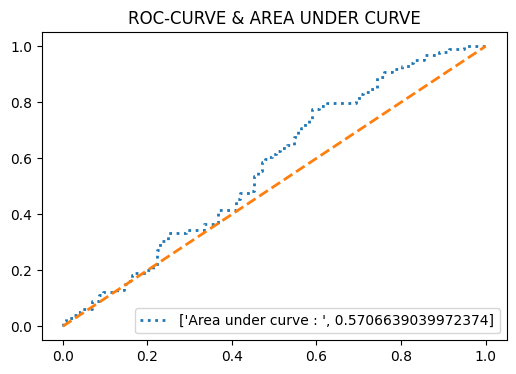

In [ ]:
model(pipeline,X_train, y_train, test_X, test_y)

It's not as good as the Catboost model.

##Trial 5- XGBoost with a moving window

Let's try XGBoost as well

In [ ]:
cat_cols = ['TICKER','Sector Name']
train_df[cat_cols]=train_df[cat_cols].astype('category')
prediction_df[cat_cols]=prediction_df[cat_cols].astype('category')
last10_years=all_years[all_years>2012]

def objective_dt(trial, df, years):

  selector_params = {
      'threshold': trial.suggest_float('threshold', 0.05, 0.15),
      }

  hyper_params = {
            'learning_rate': trial.suggest_float('learning_rate', 0.0001, 0.1, log=True),
            'max_depth': trial.suggest_int('max_depth', 2, 20, step=2),
            'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
            'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
            'max_bin': trial.suggest_int('max_bin', 32, 256),
            "n_estimators": trial.suggest_int('n_estimators', 200, 500, step=100),
            "random_state": 77
        }

  column_transformer = make_column_transformer(
    (ce.target_encoder.TargetEncoder(min_samples_leaf=1, smoothing=0, return_df=True), cat_cols),
    remainder="passthrough"
    )

  pipeline = Pipeline([
    ('preprocessor', column_transformer),
    ('feature_selection', VarianceThreshold(**selector_params)),
    ('classifier', XGBClassifier(**hyper_params))
    ])


  auc_scores=[]

  for year in years[2:-1]:

    X_train=df.drop(['gvkey','permno','public_date','cusip',
                         '6m_return','label'],axis=1)[df['year'].isin(years[years<year][-2:])]
    y_train=df['label'][df['year'].isin(years[years<year][-2:])]

    condition_val= (df['year']==year)
    X_val=df.drop(['gvkey','permno','public_date','cusip',
                             '6m_return','label'],axis=1)[condition_val]
    y_val=df['label'][condition_val]

    pipeline.fit(X_train,y_train)
    y_pred= pipeline.predict(X_val)
    metric = roc_auc_score(y_val, y_pred)
    auc_scores=auc_scores+[metric]

  auc_mean=np.mean(auc_scores)
  return auc_mean

In [ ]:
study5 = optuna.create_study(direction="maximize")

[I 2023-08-05 01:49:42,665] A new study created in memory with name: no-name-638776cc-6012-4bb5-ac95-19b77ad0a0ca


In [ ]:
study5.optimize(lambda trial: objective_dt(trial, train_df, last10_years), n_trials=50,  gc_after_trial=True)

[I 2023-08-05 01:50:32,262] Trial 0 finished with value: 0.5563121404339707 and parameters: {'threshold': 0.14103171819354043, 'learning_rate': 0.008262865726693337, 'max_depth': 4, 'reg_alpha': 0.004514560646188714, 'reg_lambda': 0.0005166969780607301, 'max_bin': 69, 'n_estimators': 200}. Best is trial 0 with value: 0.5563121404339707.
[I 2023-08-05 01:50:57,551] Trial 1 finished with value: 0.5671934354619094 and parameters: {'threshold': 0.1265504136273164, 'learning_rate': 0.00835048782272422, 'max_depth': 16, 'reg_alpha': 5.131761601010598e-07, 'reg_lambda': 7.95714770378929e-06, 'max_bin': 167, 'n_estimators': 200}. Best is trial 1 with value: 0.5671934354619094.
[I 2023-08-05 01:51:07,075] Trial 2 finished with value: 0.5408437420851187 and parameters: {'threshold': 0.08164070713242666, 'learning_rate': 0.00011034684758422008, 'max_depth': 2, 'reg_alpha': 3.819085389490075e-08, 'reg_lambda': 7.468711778109366e-08, 'max_bin': 158, 'n_estimators': 400}. Best is trial 1 with value:

##Trial 5- Best Result

In [ ]:

selector_params = {
      'threshold': 0.14905931766482253
      }

hyper_params = {
            'learning_rate': 0.009716960958056868,
            'max_depth': 16,
            'reg_alpha': 2.1325701710127746e-06,
            'reg_lambda': 2.2228793754225017e-08,
            'max_bin': 252,
            "n_estimators": 200,
            "random_state": 77
        }

column_transformer = make_column_transformer(
    (ce.target_encoder.TargetEncoder(min_samples_leaf=1, smoothing=0, return_df=True), cat_cols),
    remainder="passthrough"
    )

pipeline_xgb = Pipeline([
    ('preprocessor', column_transformer),
    ('feature_selection', VarianceThreshold(**selector_params)),
    ('classifier', XGBClassifier(**hyper_params))
    ])

X_train=train_df.drop(['gvkey','permno','public_date','cusip',
                         '6m_return','label'],axis=1)[train_df['year'].isin(all_years[all_years<2022][-2:])]
y_train=train_df['label'][train_df['year'].isin(all_years[all_years<2022][-2:])]

pipeline_xgb.fit(X_train,y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('targetencoder',
                                                  TargetEncoder(min_samples_leaf=1,
                                                                smoothing=0),
                                                  ['TICKER', 'Sector Name'])])),
                ('feature_selection',
                 VarianceThreshold(threshold=0.14905931766482253)),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsa...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.009716960958056868, max_bin=252,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=16,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, predictor=None,
                               random_state=77, ...))])

In [ ]:
test_X=train_df.drop(['gvkey','permno','public_date','cusip',
                   '6m_return','label'],axis=1)[train_df['year']==2022]
test_y=train_df['label'][train_df['year']==2022]

In [ ]:
y_hat=pipeline_xgb.predict(test_X)
print ("Accuracy score : ", accuracy_score(y_hat,test_y))
cm_xgb = confusion_matrix(test_y, y_hat)
print("Confusion Matrix:")
print(cm_xgb)

Accuracy score :  0.4675925925925926
Confusion Matrix:
[[56 61]
 [54 45]]


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('targetencoder',
                                                  TargetEncoder(min_samples_leaf=1,
                                                                smoothing=0),
                                                  ['TICKER', 'Sector Name'])])),
                ('feature_selection',
                 VarianceThreshold(threshold=0.14905931766482253)),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsa...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.009716960958056868, max_bin=252,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                           

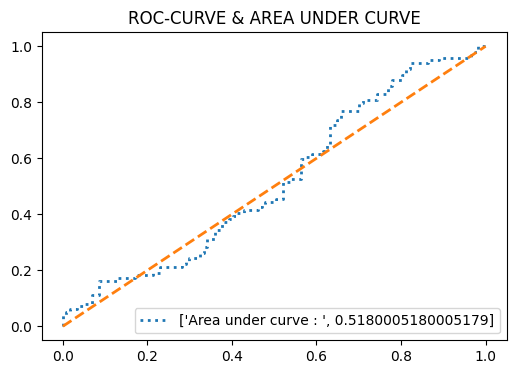

In [ ]:
model(pipeline_xgb, X_train, y_train, test_X, test_y)

## Feature Importances

In this step, we evaluate our best model for 3 different years, 2019, 2021 and 2022.

In [ ]:
cat_cols = ['TICKER','Sector Name']
train_df[cat_cols]=train_df[cat_cols].astype('category')
prediction_df[cat_cols]=prediction_df[cat_cols].astype('category')

In [ ]:
hyper_params = {

        'learning_rate': 0.009245549410603364,
        "max_depth": 6,
        "l2_leaf_reg":  0.010527649897106714,
        "min_data_in_leaf": 80,
        'verbose':0,
        'cat_features': cat_cols,
        "random_state": 77,
        "n_estimators": 200
        }


clf = CatBoostClassifier(**hyper_params)

## Predictions for 2022

In [ ]:
X_train=train_df.drop(['gvkey','permno','public_date','cusip',
                         '6m_return','label'],axis=1)[train_df['year'].isin(all_years[all_years<2022][-2:])]
y_train=train_df['label'][train_df['year'].isin(all_years[all_years<2022][-2:])]

clf.fit(X_train,y_train)

test_X=train_df.drop(['gvkey','permno','public_date','cusip',
                   '6m_return','label'],axis=1)[train_df['year']==2022]
test_y=train_df['label'][train_df['year']==2022]

y_hat=clf.predict(test_X)
print ("Accuracy score : ", accuracy_score(y_hat,test_y))
cm_catboost2022 = confusion_matrix(test_y, y_hat)
print("Confusion Matrix:")
print(cm_catboost2022)

Accuracy score :  0.6157407407407407
Confusion Matrix:
[[86 31]
 [52 47]]


Accuracy score :  0.6157407407407407
Recall score   :  0.6025641025641025
classification report :
               precision    recall  f1-score   support

           0       0.74      0.62      0.67       138
           1       0.47      0.60      0.53        78

    accuracy                           0.62       216
   macro avg       0.60      0.61      0.60       216
weighted avg       0.64      0.62      0.62       216



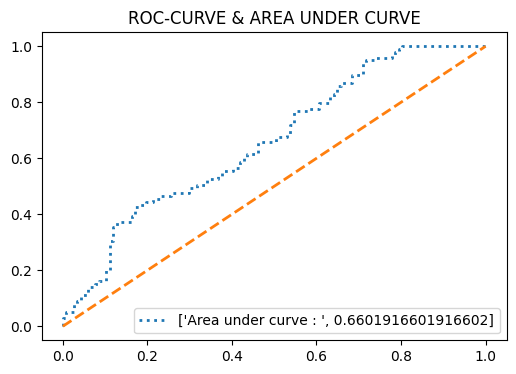

In [ ]:
model(clf,X_train, y_train, test_X, test_y)

## Feature Importances for 2022 predictions

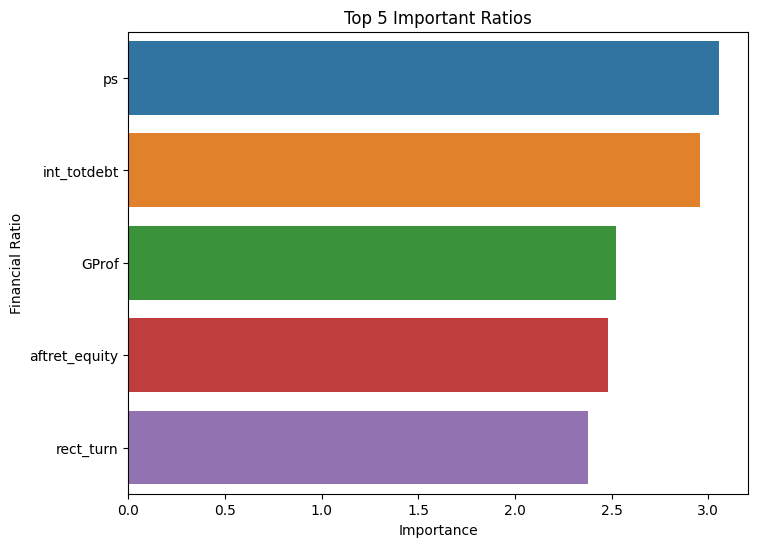

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

nonratio_cols = ['TICKER','Sector Name','month','year']

# Get feature importance scores
feature_importance = clf.get_feature_importance()

# Get feature names
feature_names = X_train.columns

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df=feature_importance_df[~(feature_importance_df['Feature'].isin(nonratio_cols))]

# Plot the top 10 important features
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(5))
plt.xlabel('Importance')
plt.ylabel('Financial Ratio')
plt.title('Top 5 Important Ratios')
plt.show()


## Predictions for 2021

In [ ]:
X_train=train_df.drop(['gvkey','permno','public_date','cusip',
                         '6m_return','label'],axis=1)[train_df['year'].isin(all_years[all_years<2021][-2:])]
y_train=train_df['label'][train_df['year'].isin(all_years[all_years<2021][-2:])]

clf.fit(X_train,y_train)

test_X=train_df.drop(['gvkey','permno','public_date','cusip',
                   '6m_return','label'],axis=1)[train_df['year']==2021]
test_y=train_df['label'][train_df['year']==2021]

y_hat=clf.predict(test_X)
print ("Accuracy score : ", accuracy_score(y_hat,test_y))
cm_catboost2021 = confusion_matrix(test_y, y_hat)
print("Confusion Matrix:")
print(cm_catboost2021)

Accuracy score :  0.583732057416268
Confusion Matrix:
[[154  73]
 [101  90]]


Accuracy score :  0.583732057416268
Recall score   :  0.5521472392638037
classification report :
               precision    recall  f1-score   support

           0       0.68      0.60      0.64       255
           1       0.47      0.55      0.51       163

    accuracy                           0.58       418
   macro avg       0.57      0.58      0.57       418
weighted avg       0.60      0.58      0.59       418



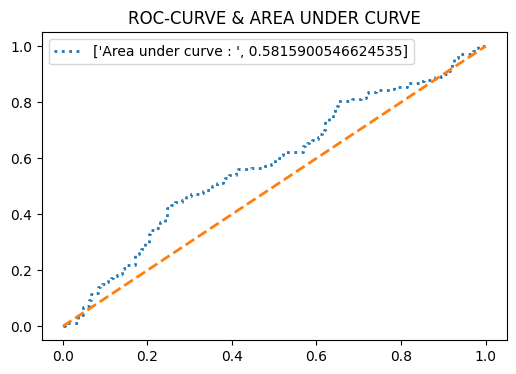

In [ ]:
model(clf,X_train, y_train, test_X, test_y)

## Feature Importances for 2021 predictions

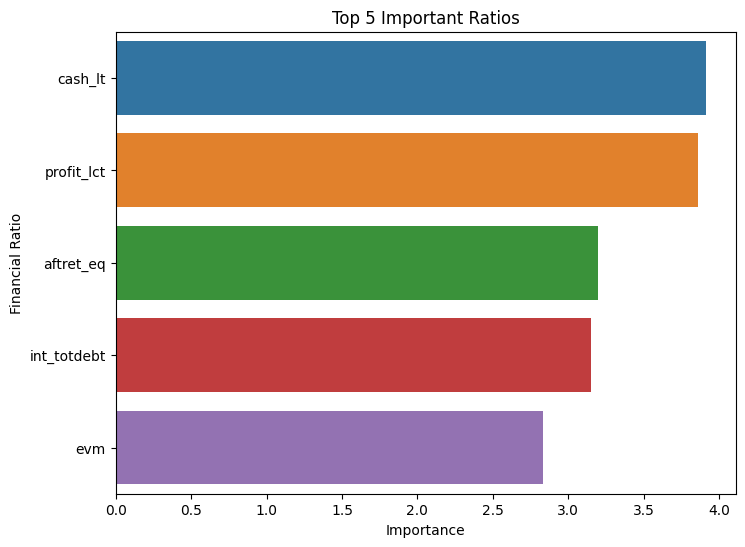

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

nonratio_cols = ['TICKER','Sector Name','month','year']

# Get feature importance scores
feature_importance = clf.get_feature_importance()

# Get feature names
feature_names = X_train.columns

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df=feature_importance_df[~(feature_importance_df['Feature'].isin(nonratio_cols))]

# Plot the top 10 important features
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(5))
plt.xlabel('Importance')
plt.ylabel('Financial Ratio')
plt.title('Top 5 Important Ratios')
plt.show()


## Predictions for 2019

In [ ]:
X_train=train_df.drop(['gvkey','permno','public_date','cusip',
                         '6m_return','label'],axis=1)[train_df['year'].isin(all_years[all_years<2019][-2:])]
y_train=train_df['label'][train_df['year'].isin(all_years[all_years<2019][-2:])]

clf.fit(X_train,y_train)

test_X=train_df.drop(['gvkey','permno','public_date','cusip',
                   '6m_return','label'],axis=1)[train_df['year']==2019]
test_y=train_df['label'][train_df['year']==2019]

y_hat=clf.predict(test_X)
print ("Accuracy score : ", accuracy_score(y_hat,test_y))
cm_catboost2019 = confusion_matrix(test_y, y_hat)
print("Confusion Matrix:")
print(cm_catboost2019)

Accuracy score :  0.8059701492537313
Confusion Matrix:
[[208  50]
 [ 41 170]]


Accuracy score :  0.8059701492537313
Recall score   :  0.7727272727272727
classification report :
               precision    recall  f1-score   support

           0       0.81      0.84      0.82       249
           1       0.81      0.77      0.79       220

    accuracy                           0.81       469
   macro avg       0.81      0.80      0.80       469
weighted avg       0.81      0.81      0.81       469



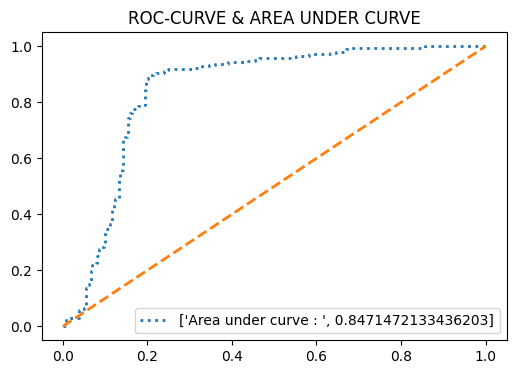

In [ ]:
model(clf,X_train, y_train, test_X, test_y)

## Feature Importances for 2019 predictions

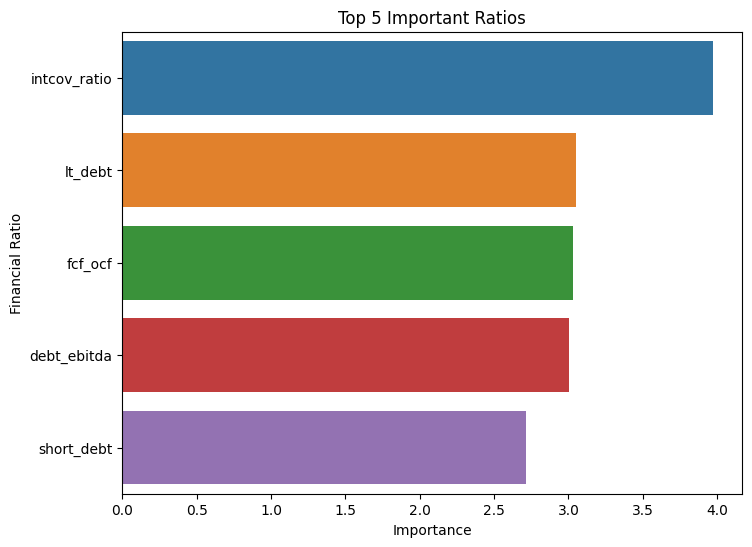

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

nonratio_cols = ['TICKER','Sector Name','month','year']

# Get feature importance scores
feature_importance = clf.get_feature_importance()

# Get feature names
feature_names = X_train.columns

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df=feature_importance_df[~(feature_importance_df['Feature'].isin(nonratio_cols))]

# Plot the top 10 important features
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(5))
plt.xlabel('Importance')
plt.ylabel('Financial Ratio')
plt.title('Top 5 Important Ratios')
plt.show()


**Conclusion:**

The outcome suggests that it is always essential to try and validate different windows when using ML algorithms on historical stock data. In the next stage, it was attempted to examine the performance of the model for different years. The returns were predicted for 3 different years: 2019, 2021, and 2022. Although the Catboost model showed somewhat acceptable performance, its predictive power did not seem much stable in different windows. For example, while the model showed a high predictive power for 2019, it performed poorly for 2021. This can be an indication of rapid changes in the dynamics of the market that makes it impossible to have a single ML model that is statistically convincing and can show consistent stability over different years. 

In addition, the top important features in making predictions were investigated for the years in question to see if there are any important drivers in common to be used for an AI-driven product. However, it turned out that except “int_totdebt” which is important for both 2021 and 2022 predictions, all other important features vary across these 3 years. In other words, the drivers of the 6-month returns are found totally different for each year by this ML model.

This can be interpreted as rapid changes in the drivers of the market that make it somehow impossible to develop an ML model with a predetermined set of features that could make accurate predictions for any given time in the future. As such, we always need to update and revise these models based on new observations. 